In [1]:
pip install missingno

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer,SimpleImputer
import numpy as np
import missingno as msno
import seaborn as sns

data = pd.read_csv("water_potability.csv")

# CS 363M Group 48 Project Submssion

## Subject : Water Potability Detection
### -Water is an essential part of our life. However, billions of people have a limited access to clean water. Especially in Africa, 115 people die in every hours from disease from contaminated water. Therefore, by examining the portability of water, we can specify a clean water more easily and cost-efficiently.

# Explanation of Data Set

### Overview:
- Dataset determined whether water is safe based on 9 features.
- Dataset have one clssification called Potability
- Size: Data contains 3276 data sets

In [3]:
"""
Shape of the data
"""

data.shape

(3276, 10)

In [4]:
"""
First Five Rows
"""

data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

### Dataset determined whether water is safe based on 9 features.

#### Data Set Explanation from the source
#### 1. pH value:
- PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
#### 2. Hardness:
- Hardness is caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

#### 3. Solids (Total dissolved solids - TDS):
- Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

#### 4. Chloramines:
- Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

#### 5. Sulfate:
- Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

#### 6. Conductivity:
- Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

#### 7. Organic_carbon:
- Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

#### 8. Trihalomethanes:
- THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

#### 9. Turbidity:
- The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

#### 10. Potability:
- Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Data Cleaning

## Cleaning Missing Data

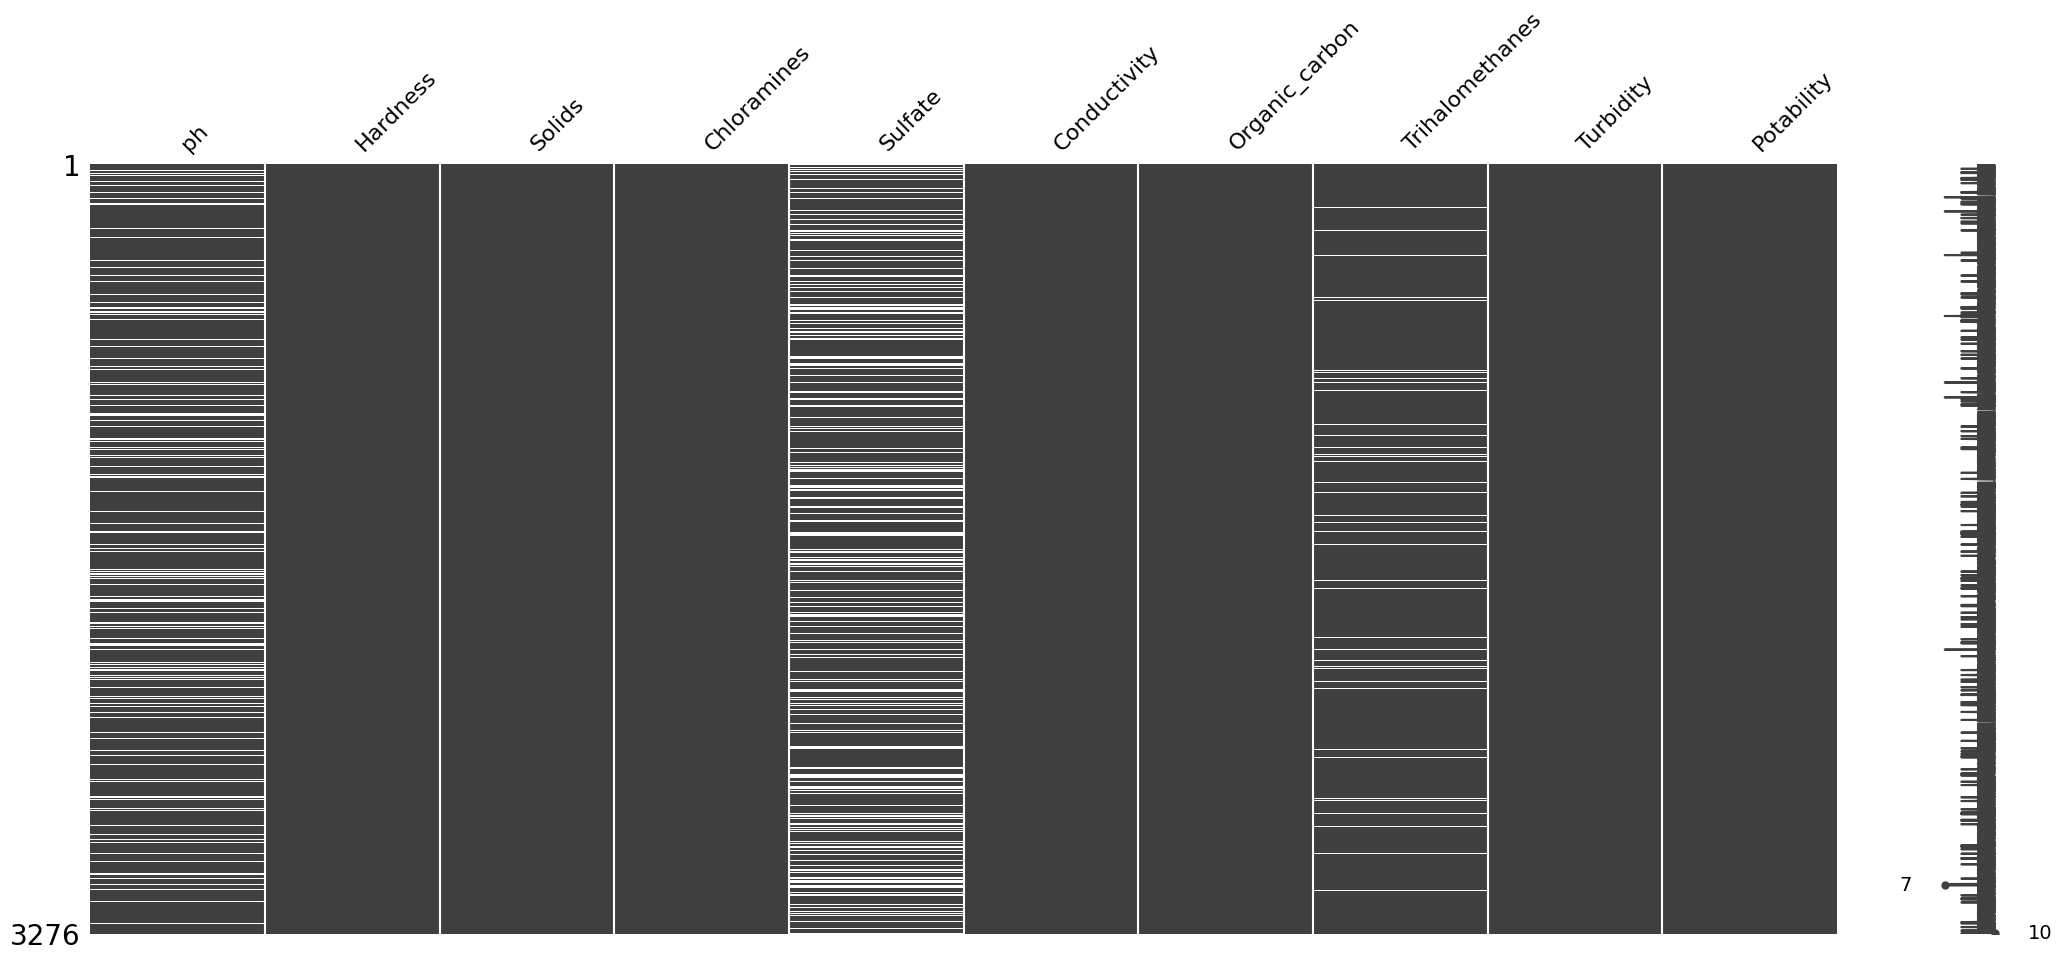

In [5]:
"""
Visualization for missing values
"""
msno.matrix(data)
plt.show()

In [6]:
"""
Number of Missing data
"""
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# We can see there are
- 491 missing values from ph
- 781 missing values from sulfate
- 161 missing values from Trihalomethanes

### First Solution: Leave the Null value it self.
- Some machine learning algorithm can detect null values and ignore it. So our first strategy is leaving null as blank.

In [7]:
data_with_null = data.copy(deep=True)

### Second Solution: Delete every null values.
- Easiest but Safest way

In [8]:
data_delete_Null = data.dropna()

### Thrid Solution:KNN Imputation
- Based on the background knowledge, PH, Hardness, Suflate, Conductivity, Organic_carbon, and Trihalomethanes are closely related.
- Therefore, by using KNN Impuation, we can predict the closest value of missing data

In [9]:
data_knn = data.copy(deep=True)

mean_imputer = KNNImputer(n_neighbors = 3, weights = 'distance')
data_knn.iloc[:,:] = mean_imputer.fit_transform(data_knn)

<ipython-input-9-2b118d89dba9>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_knn.iloc[:,:] = mean_imputer.fit_transform(data_knn)


In [10]:
data_knn.shape

(3276, 10)

In [11]:
data_knn.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Fourth Solution:Normal filling
- Our rationale behind this is that most of the data follows a normal distribution, so we can fill in the missing na values with randomly generated values from the normal distribution of each column.

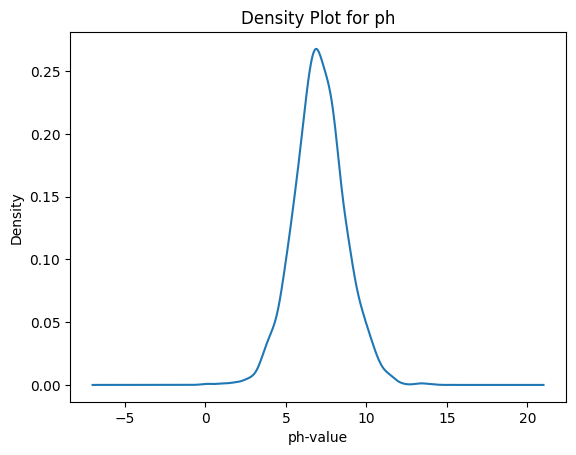

In [12]:
data["ph"].plot.density()
plt.title("Density Plot for ph")
plt.xlabel("ph-value")
plt.show()

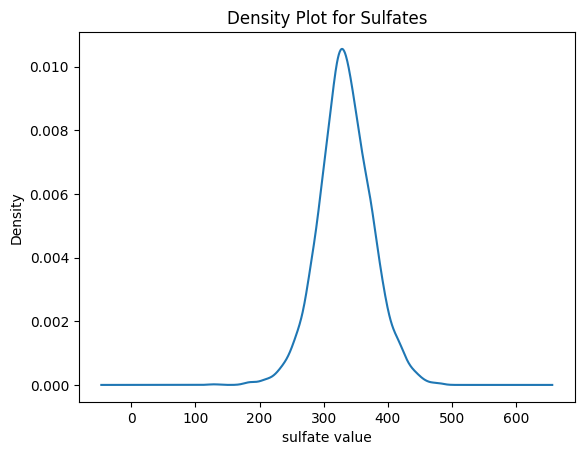

In [13]:
data["Sulfate"].plot.density()
plt.title("Density Plot for Sulfates")
plt.xlabel("sulfate value")
plt.show()

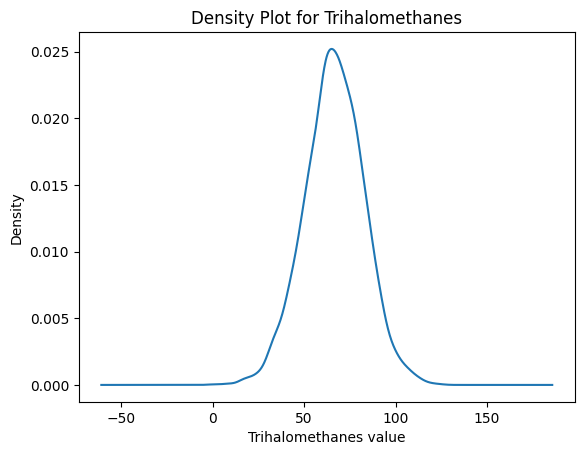

In [14]:
data["Trihalomethanes"].plot.density()
plt.title("Density Plot for Trihalomethanes")
plt.xlabel("Trihalomethanes value")
plt.show()

In [15]:
#function to fill missing na values with a normal distribution of its column
def fill_norm(data, column, na_size):
    data[column]=data[column].astype(float) #convert data from strings to floats
    my_mean = data[column].mean()
    my_std = data[column].std()
    x = np.random.normal(loc=my_mean, scale=my_std, size=na_size)
    x = pd.Series(x)
    nulls = data[pd.isnull(data[column])]

    for i, ni in enumerate(nulls.index[:len(x)]):
        data[column][ni] = x[i]

In [16]:
### Normal Distrution
pd.options.mode.chained_assignment = None #supress warnings
na_size_ph = data["ph"].isna().sum()
na_size_Sulfate = data["Sulfate"].isna().sum()
na_size_Trihalomethanes = data["Trihalomethanes"].isna().sum()

data_norm = data.copy()
fill_norm(data_norm, "ph", na_size_ph)
fill_norm(data_norm, "Sulfate", na_size_Sulfate)
fill_norm(data_norm, "Trihalomethanes", na_size_Trihalomethanes)

data_norm.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Cleaning Duplicate Data

Let's try to remove duplicates (although there may not be any since the values are very unique)

In [17]:
#remove duplicates
data_with_null.drop_duplicates(inplace=True)
data_delete_Null.drop_duplicates(inplace = True)
data_knn.drop_duplicates(inplace = True)
data_norm.drop_duplicates(inplace = True)

print("data shapes: " + "Keeping null: " + str(data_with_null.shape) + " Dropping null: " + \
      str(data_delete_Null.shape) + " knn: " + str(data_knn.shape) + " normal: " + str(data_norm.shape))

data shapes: Keeping null: (3276, 10) Dropping null: (2011, 10) knn: (3276, 10) normal: (3276, 10)


# Data Exploration

## Univariate Analysis

In [18]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

<Axes: >

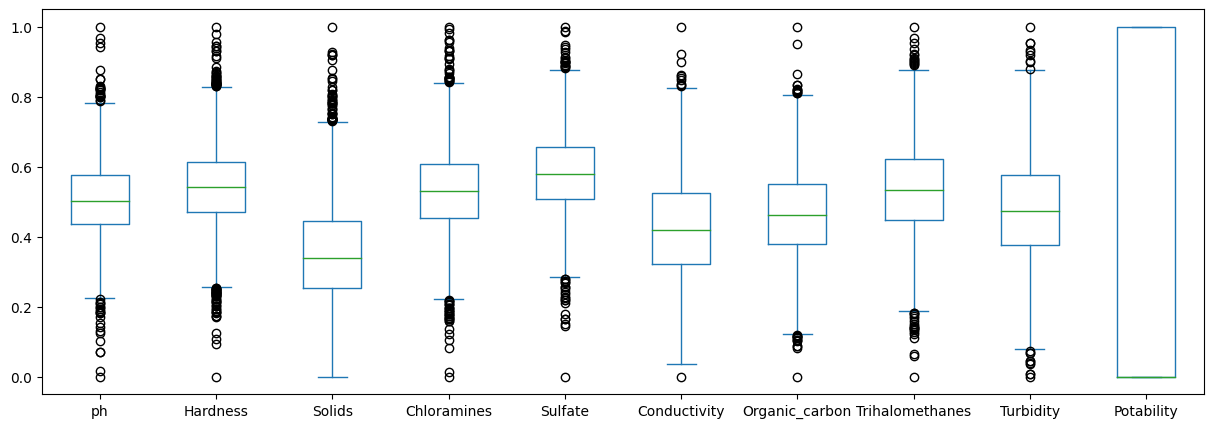

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

df_scaled.plot.box(figsize = (15,5))

- You can see there is an outlier at Solids, Sulfate. There's might be some at conductivity.
- Also, we can figure out that data are mostly evenly distributed throughout the data points.

## Bivariate Analysis

### Correlation

In [20]:
corr = data.corr()
corr

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

<Axes: >

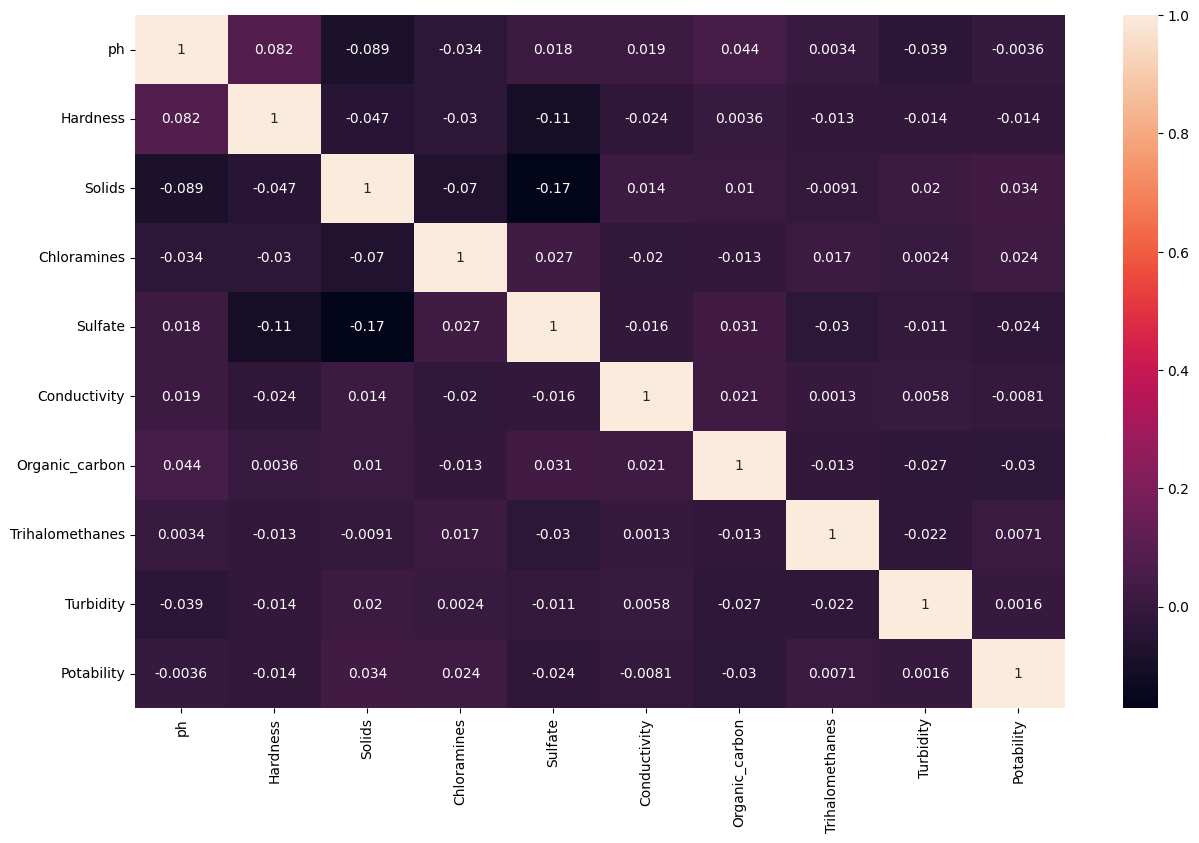

In [21]:
plt.figure(figsize = (15,9))
sns.heatmap(corr, annot = True)

- No high correlation

## Bivariate Scatter Point Graph

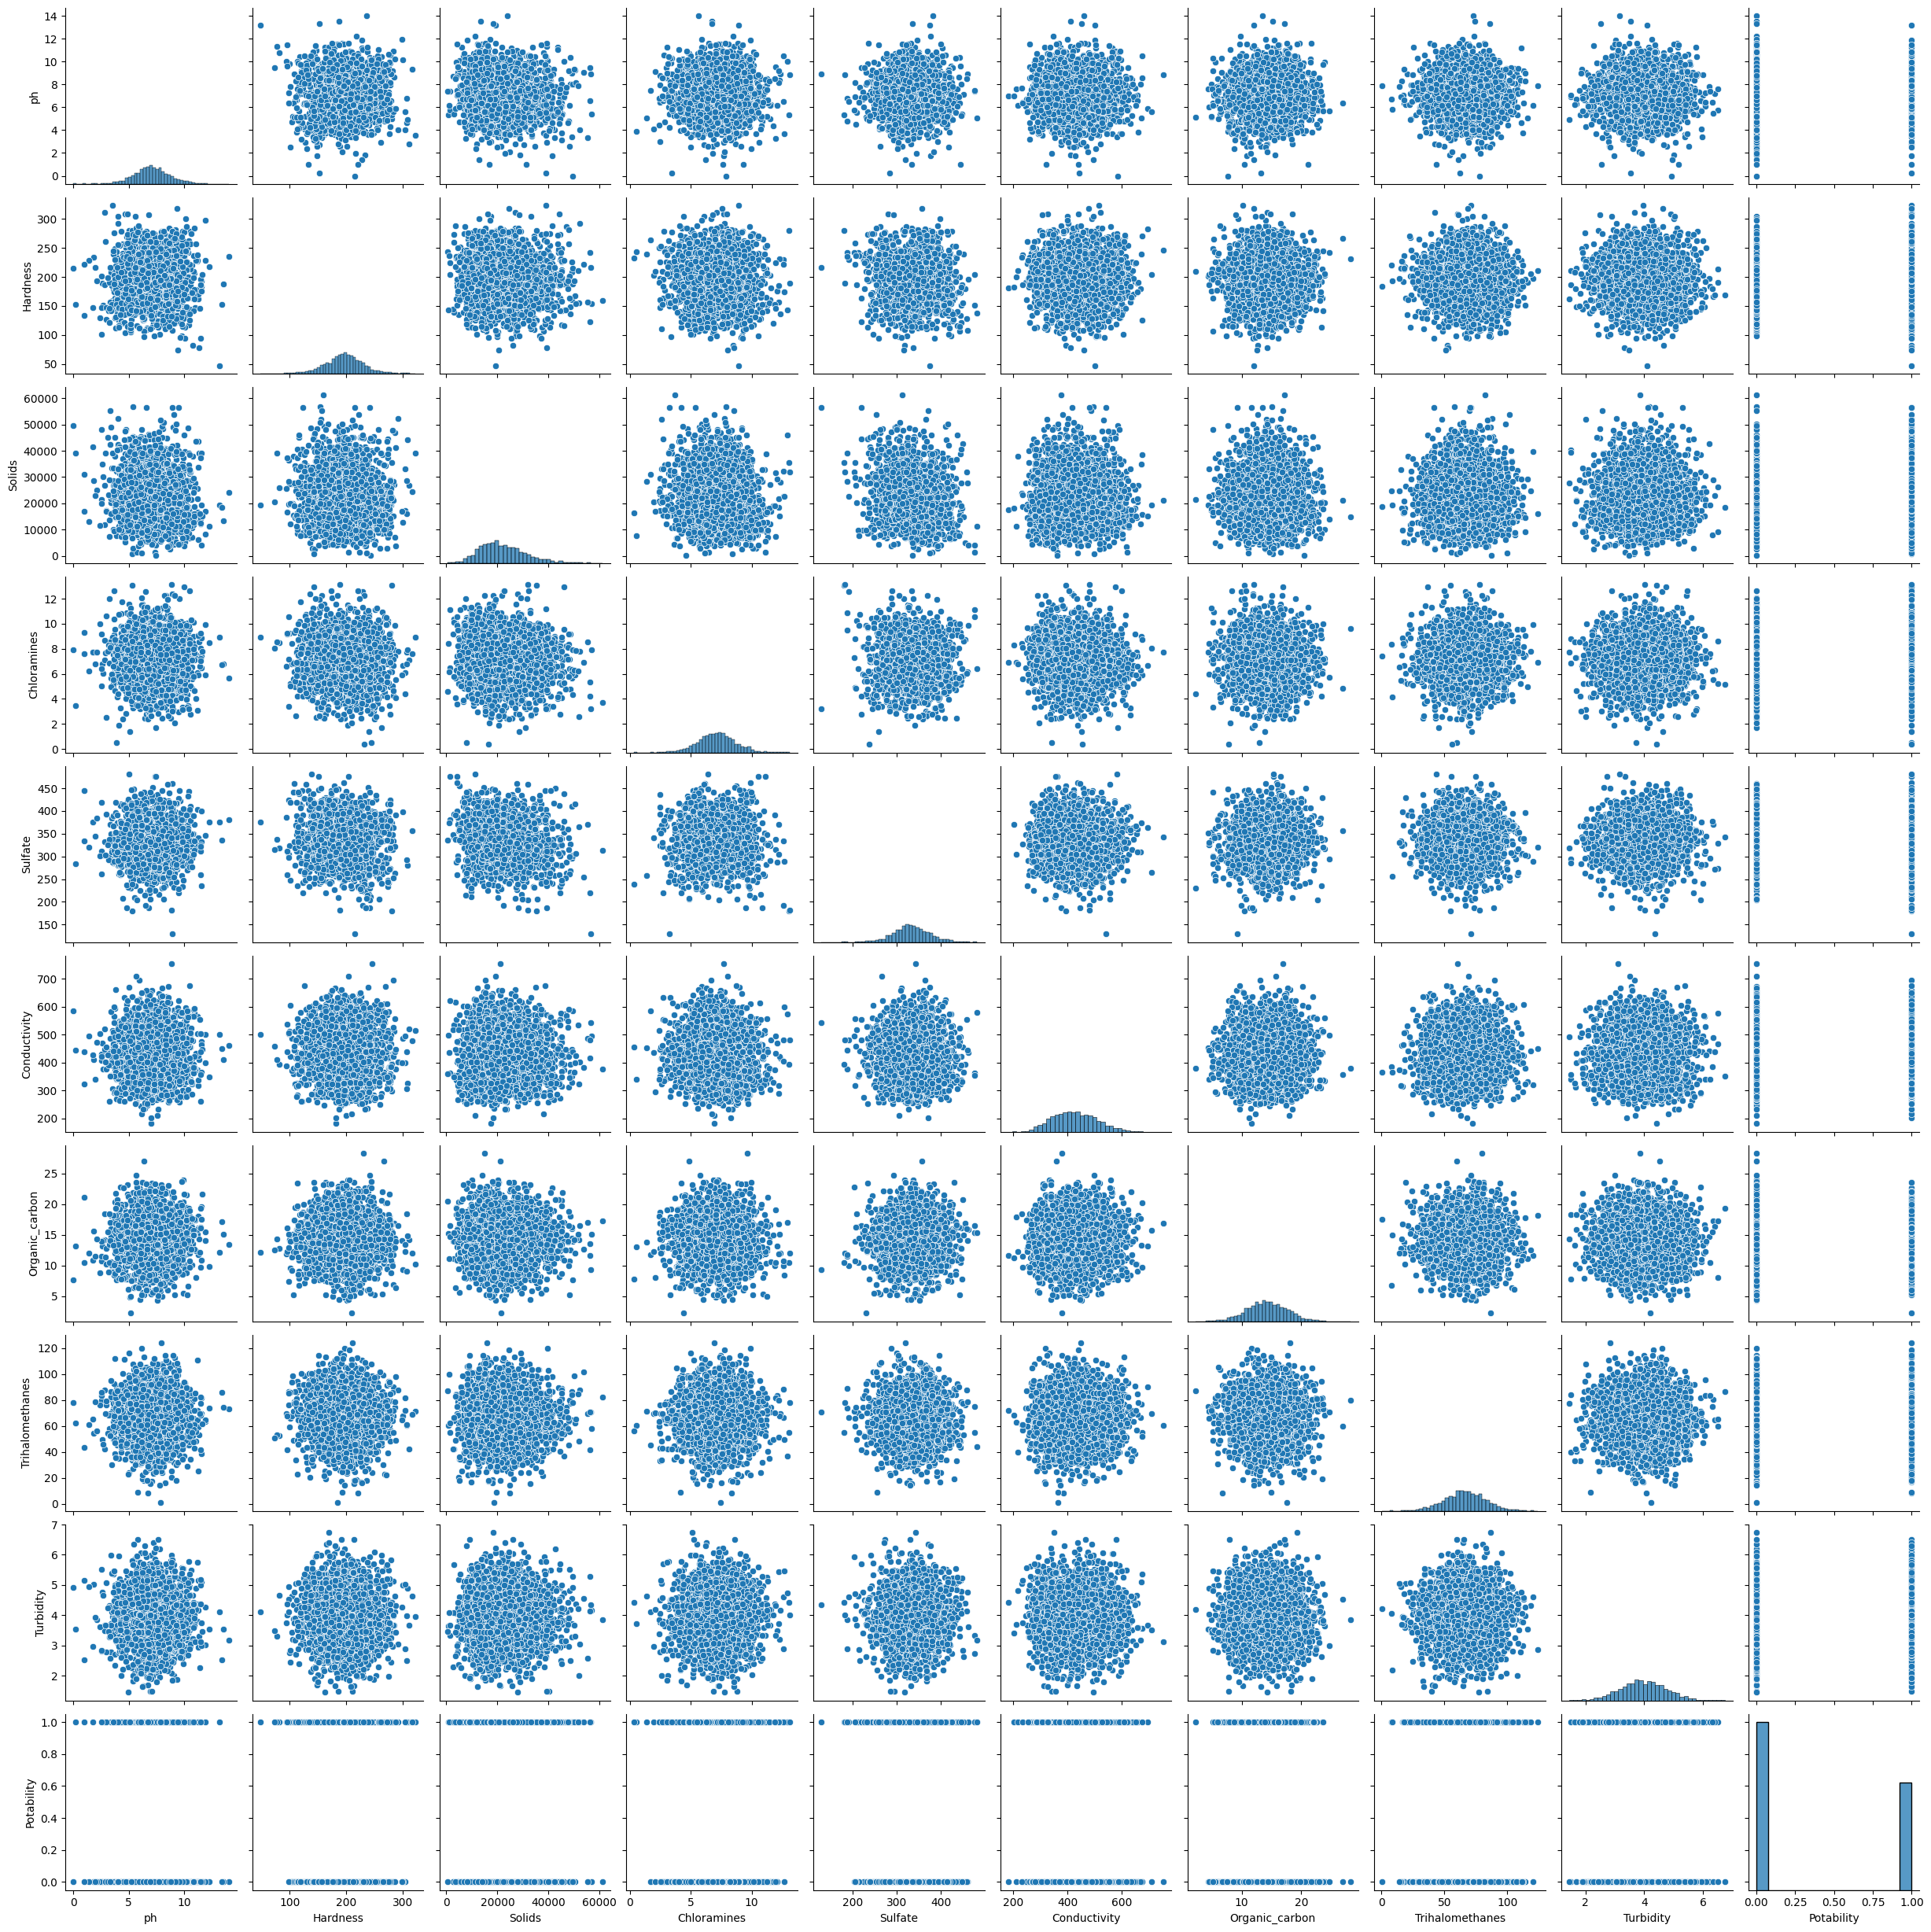

In [22]:
sns.pairplot(data)

- We can see all the graph is joint normal distributions of two variables
- Also, we can see there is some anomalies and outliers that is not reside in the cluster

# Comparison between Portable / Non Partable water

In [23]:
df_Good = data[data['Potability']==1]
df_Not_Good = data[data['Potability']==0]

In [24]:
print(df_Good.shape)

"""
We have 1278 of potable water
"""

(1278, 10)


'\nWe have 1278 of protable water\n'

In [25]:
print(df_Not_Good.shape)
"""
We have 1998 of non-potable water
"""

(1998, 10)


'\nWe have 1998 of non-protable water\n'

## Mean / Median Value Comparison

In [26]:
"""
Compare Mean Values
"""

features_hist = ['ph', 'Hardness', 'Solids', 'Chloramines','Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
d1 = df_Good.mean()
d2 = df_Not_Good.mean()

for i in range(len(features_hist)):
    print(features_hist[i])
    print("GOOD: ", end = " ")
    print(d1[i])
    print("Bad: ", end = " ")
    print(d2[i])
    print("Change rate: ", end = " ")
    print((d1[i]-d2[i])/d1[i])
    print("")

ph
GOOD:  7.0737832953812
Bad:  7.085378435983544
Change rate:  -0.001639171023222438

Hardness
GOOD:  195.80074426259276
Bad:  196.73329218472793
Change rate:  -0.004762739414741501

Solids
GOOD:  22383.99101780775
Bad:  21777.490788123265
Change rate:  0.027095267738536037

Chloramines
GOOD:  7.169338026214626
Bad:  7.092174563443736
Change rate:  0.010762982926560602

Sulfate
GOOD:  332.5669902336656
Bad:  334.5642895786881
Change rate:  -0.006005705327576771

Conductivity
GOOD:  425.38379997895566
Bad:  426.7304535650347
Change rate:  -0.003165737825807272

Organic_carbon
GOOD:  14.160892521171197
Bad:  14.364335279947
Change rate:  -0.014366520928793551

Trihalomethanes
GOOD:  66.53968374070116
Bad:  66.30355527306088
Change rate:  0.0035486863532513146

Turbidity
GOOD:  3.968328289141415
Bad:  3.965799769125516
Change rate:  0.0006371751104408156



- We have a distinct change in Solids, Chromanines, and Organic_Carbon.
- Small changes in Turbidity, PH.

In [27]:
features_hist = ['ph', 'Hardness', 'Solids', 'Chloramines','Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
d1 = df_Good.median()
d2 = df_Not_Good.median()

for i in range(len(features_hist)):
    print(features_hist[i])
    print("GOOD: ", end = " ")
    print(d1[i])
    print("Bad: ", end = " ")
    print(d2[i])
    print("Change rate: ", end = " ")
    print((d1[i]-d2[i])/d1[i])
    print("")

ph
GOOD:  7.036752103833548
Bad:  7.035455515887571
Change rate:  0.00018425943202842599

Hardness
GOOD:  196.6329070886398
Bad:  197.12342321605394
Change rate:  -0.0024945780168576783

Solids
GOOD:  21199.38661404485
Bad:  20809.618279605398
Change rate:  0.018385830757066686

Chloramines
GOOD:  7.215163009948823
Bad:  7.090333864655992
Change rate:  0.01730094595516501

Sulfate
GOOD:  331.8381671295742
Bad:  333.38942610169323
Change rate:  -0.004674745480719015

Conductivity
GOOD:  420.71272912166967
Bad:  422.2293312022622
Change rate:  -0.0036048400146074977

Organic_carbon
GOOD:  14.162808700391992
Bad:  14.293507768607896
Change rate:  -0.009228329703576841

Trihalomethanes
GOOD:  66.6782137100115
Bad:  66.54219804427565
Change rate:  0.0020398816670074075

Turbidity
GOOD:  3.958576217567654
Bad:  3.9480762530520357
Change rate:  0.0026524598589313



- We have a distinct change in Solids, Chromanines, and Organic_Carbon.
- Small changes in PH.

## Visualization for data

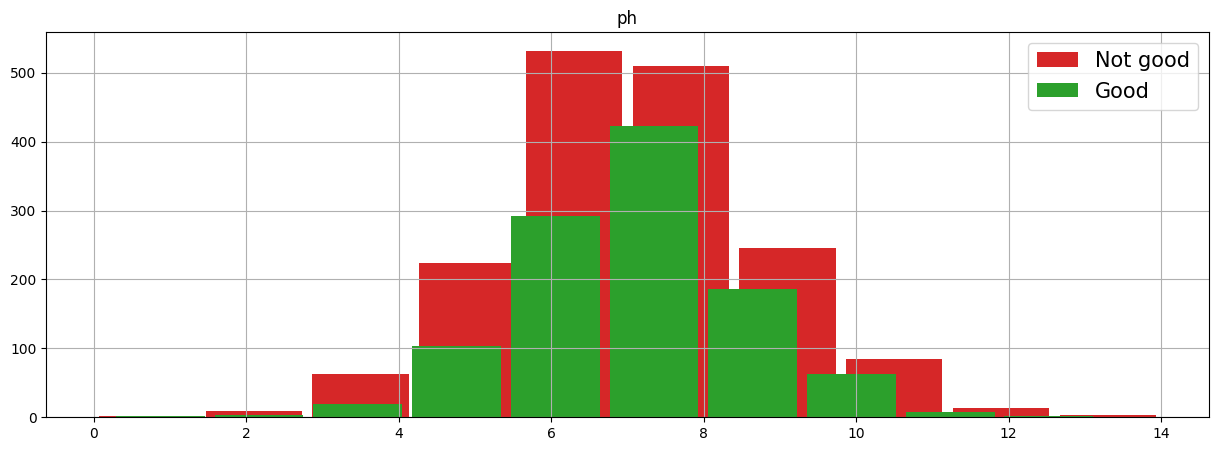

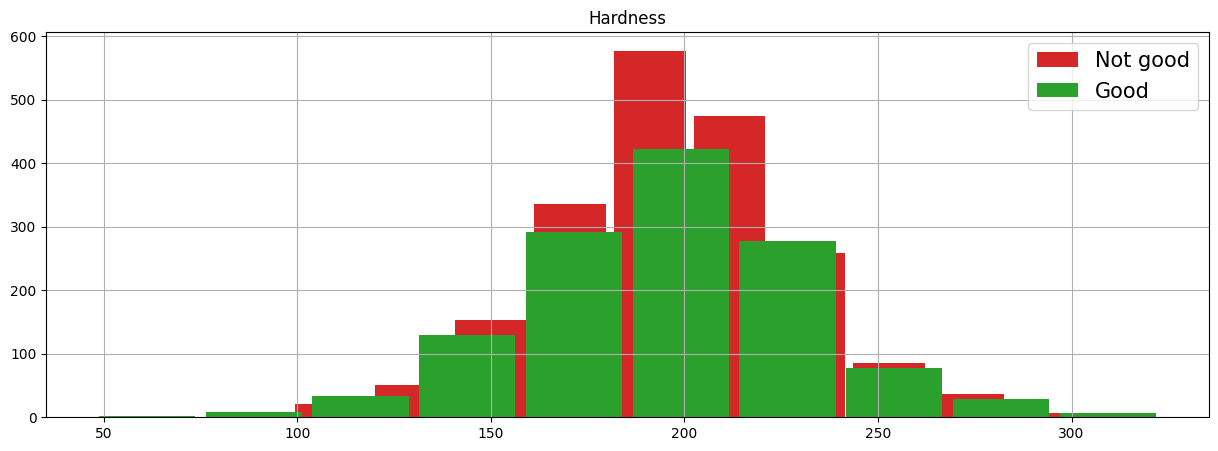

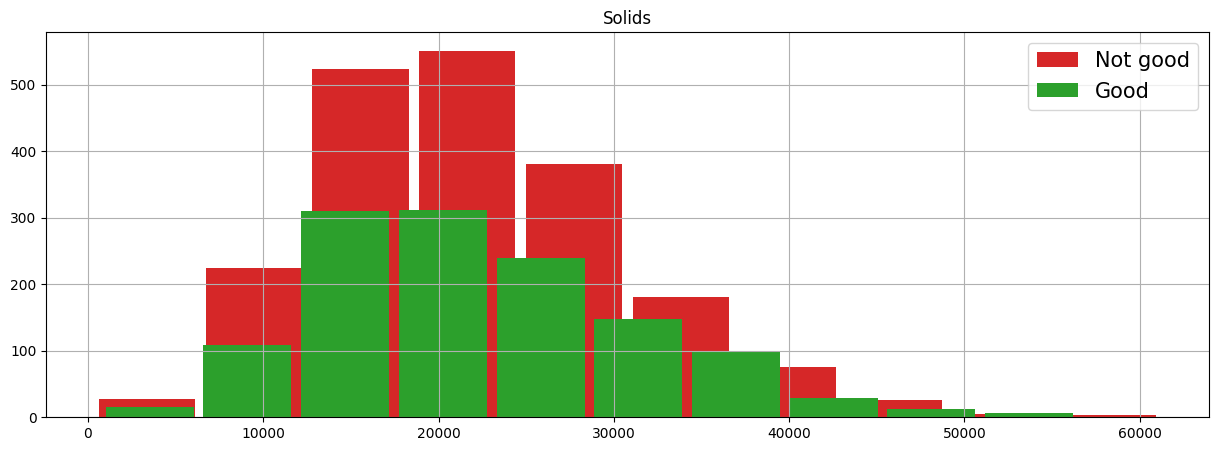

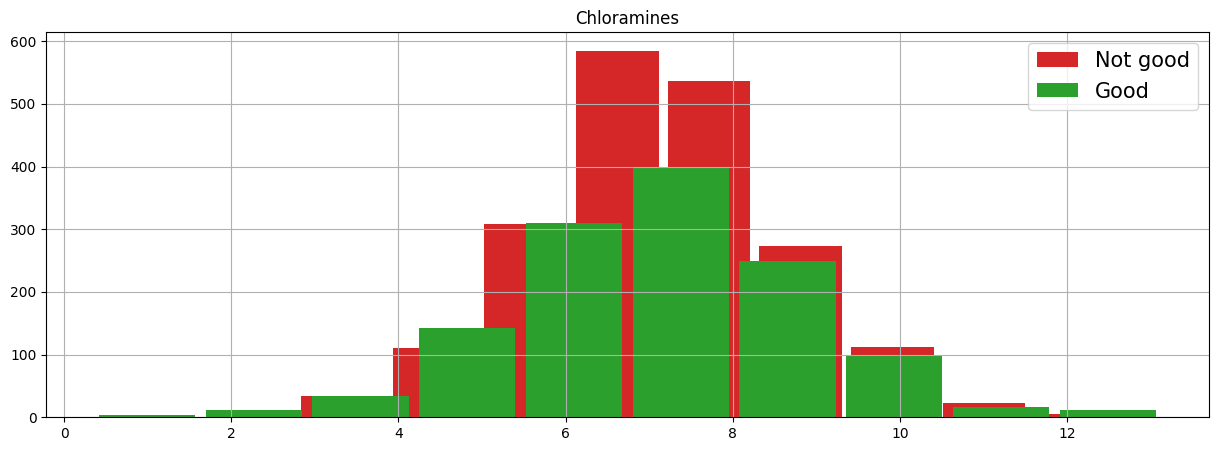

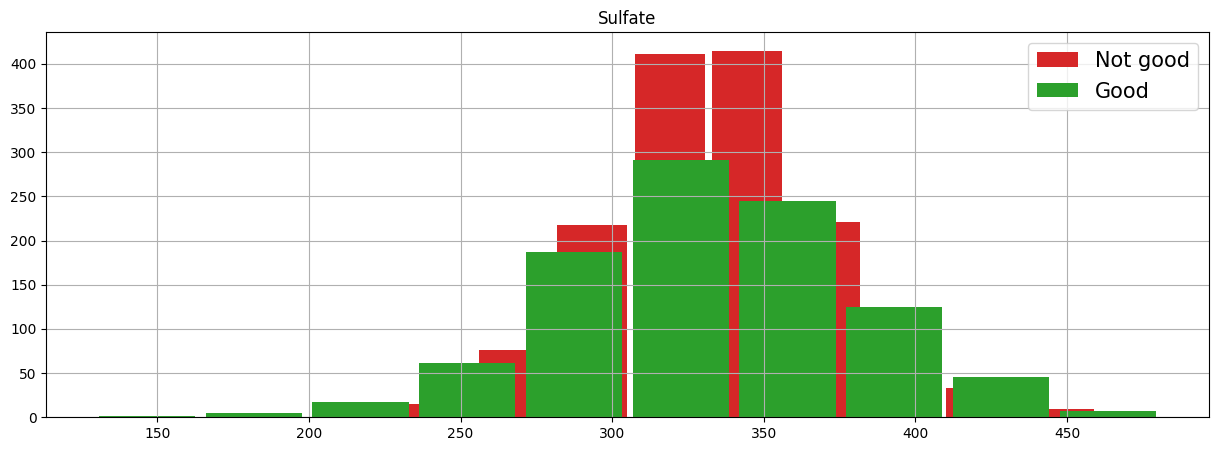

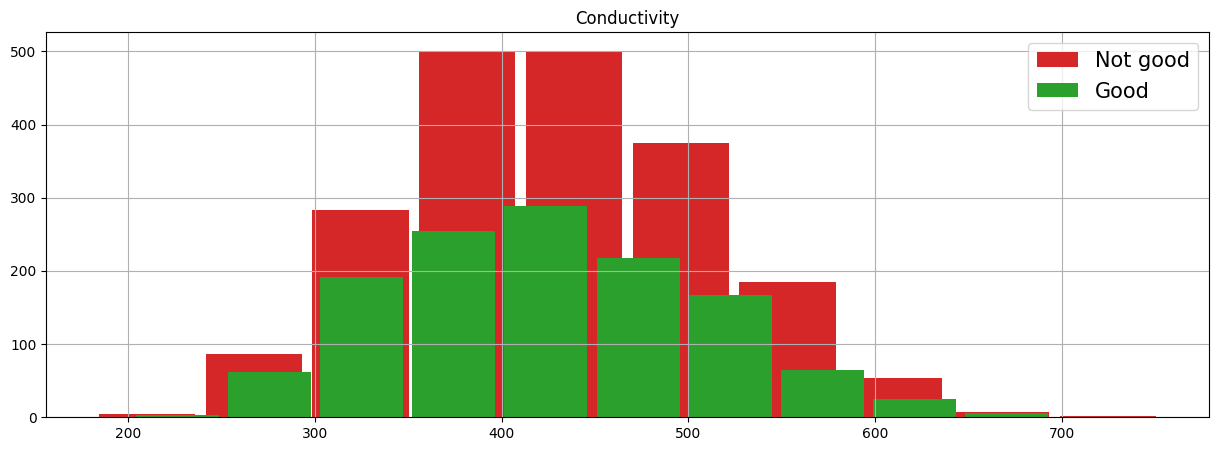

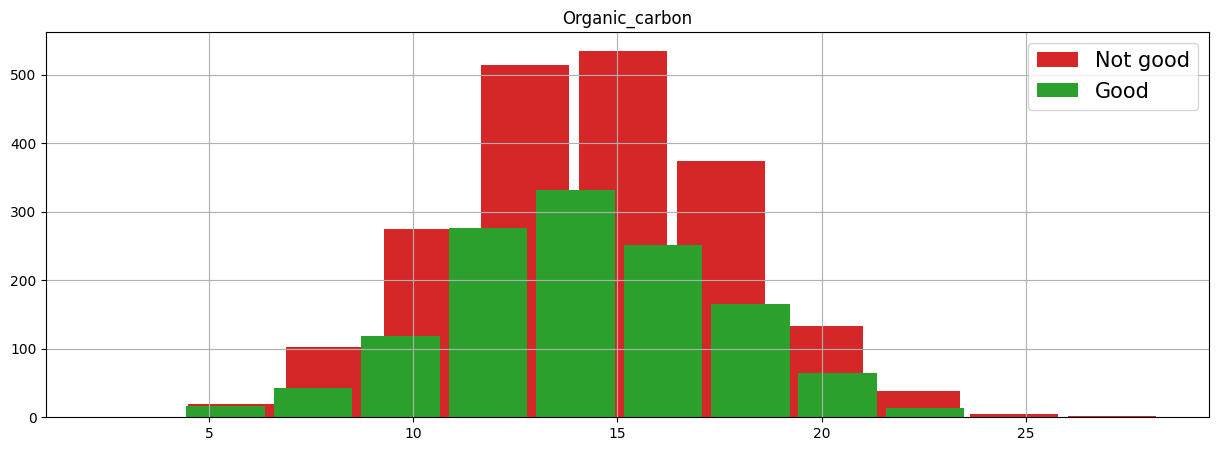

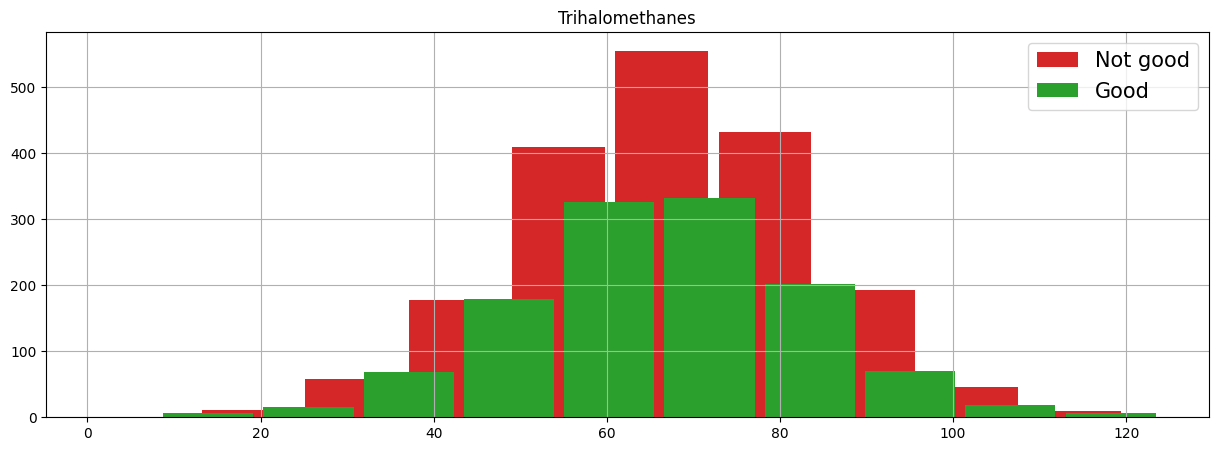

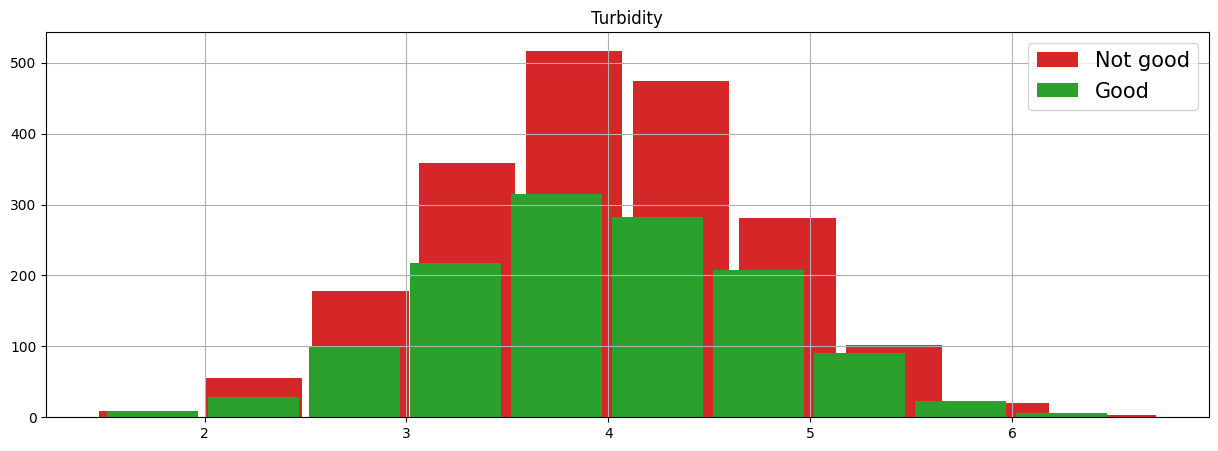

In [28]:
for x in features_hist:
    df_Not_Good[x].hist(color = "tab:red", figsize=[15, 5], rwidth=.9)
    df_Good[x].hist(color = "tab:green", figsize=[15, 5], rwidth=.9)
    plt.title(x)
    plt.legend(['Not good', 'Good'], fontsize = 15)
    plt.show()

- No Huge Difference Oveall All
- PH tends to be 7.0-8.0 when it is potable
- Solid is little lower when it is potable
- No huge difference on Harness, Chrolamine, Conductivity, Sulfate, Trihalomethanes, Turbidity.

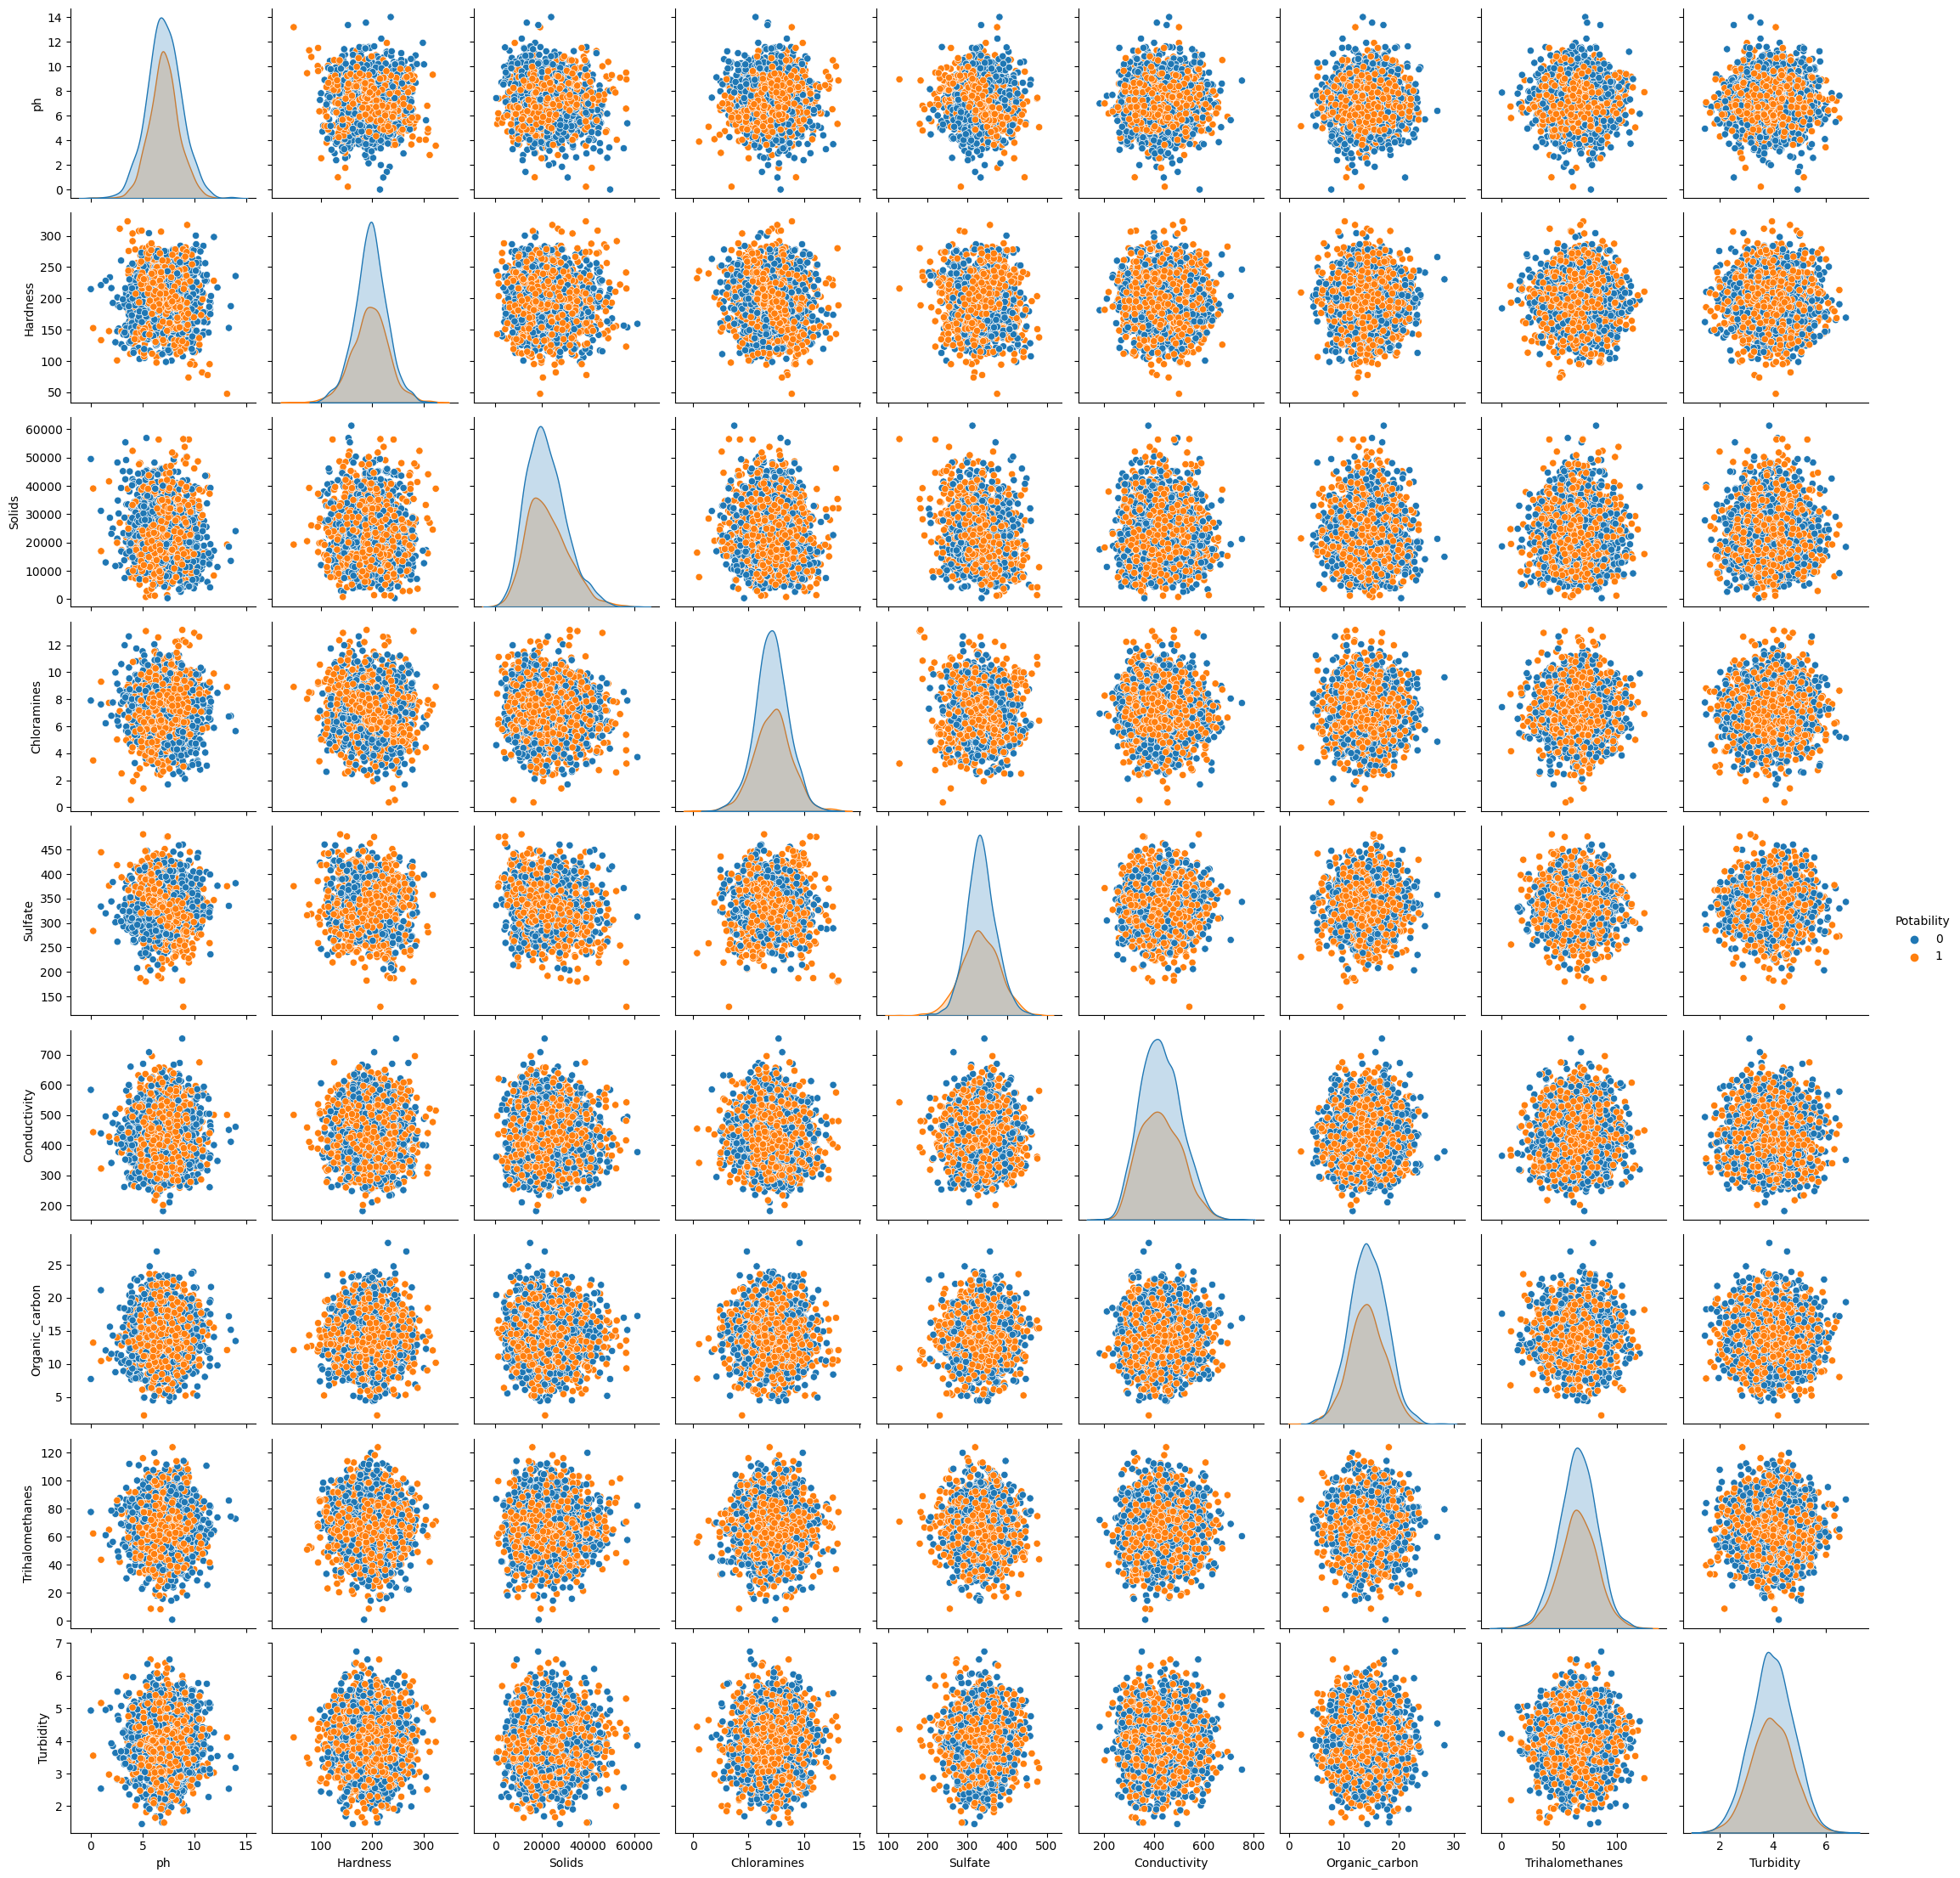

In [29]:
sns.pairplot(data, hue = 'Potability')

# Feature Engineering

### Based on Background Knowledge
Conductivity is one of the measurement to measure water quality, however it needs to be treated carefully. Conductivity changes based on two factors: salinity and temperature. Therefore, to use a conductivity as a feature, we also need to know temperature for the accuracy, but we don't have that feature. Therefore, it would be better removed for the accurate result.

Also, Conductivity and solids are correlated based on their definition, and it is simply expressed in an equation: TDS = k EC (in 25 °C). Therefore, it is duplicated feature, so we need to remove it.

Sources:
https://iopscience.iop.org/article/10.1088/1755-1315/118/1/012019#:~:text=Conductivity%20(EC)%20and%20total%20dissolved,(in%2025%20%C2%B0C).

https://atlas-scientific.com/blog/how-does-conductivity-affect-water-quality/

In [30]:
data_with_null.drop('Conductivity',  axis=1, inplace=True)
data_delete_Null.drop('Conductivity',  axis=1, inplace=True)
data_knn.drop('Conductivity',  axis=1, inplace=True)
data_norm.drop('Conductivity',  axis=1, inplace=True)

### Based on Data Exploratoin.
Throughout our data exploration, we figured out two features that has small impact on potability: pH and Turbidity.

We knows pH value is an important feature for potability, so we decided to keep this value.

Turbidity might be a good feature for measuring potability but there are so many features that affect Turbidity like Sand, Clay or Fine organic matter, which can be easily removed and might not affect the potability of water. Therefore, we decided to focus more on how our data explained about this feature. It has small relationship with potablility. Therefore, we removed this data from our dataset.

Source: https://complete-water.com/resources/how-to-treat-turbidity-in-water

In [31]:
data_with_null.drop('Turbidity',  axis=1, inplace=True)
data_delete_Null.drop('Turbidity',  axis=1, inplace=True)
data_knn.drop('Turbidity',  axis=1, inplace=True)
data_norm.drop('Turbidity',  axis=1, inplace=True)

# Outlier/Anomaly Detection
we decided to look at outliers defined by the anomaly detection algorithm and see if we should remove some of them

In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler

def plot_anomaly(data, model, model_name, data_name):
    # Standardize the data
    scaler = StandardScaler()
    #make sure to drop the label column!
    data_scaled = data.drop(columns = "Potability")
    data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

    model.fit(data_scaled)

    # Predict outliers/anomalies
    data['anomaly_score'] = model.decision_function(data_scaled)
    data['is_outlier'] = model.predict(data_scaled)
    print("indices of outliers for " + str(data_name) + ": ")
    print(data.loc[data['is_outlier'] == -1].index)

    # Visualize the results
    scatter = plt.scatter(data.index, data['anomaly_score'], c=data['is_outlier'], cmap='viridis')

    legend_labels = {1: 'Normal', -1: 'Outlier'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) \
                      for color, label in zip(['yellow', 'indigo'], legend_labels.values())]
    plt.legend(handles=legend_handles, title='Classes')
    plt.colorbar()
    plt.title(str(model_name) + ' Anomaly Detection ' + str(data_name))
    plt.ylabel('Anomaly Score')

Isolation Forest Anomaly Detection for our datasets (we can only do this for the sets without null values)

indices of outliers for normal: 
Int64Index([ 204,  227,  263,  275,  287,  310,  317,  326,  347,  365,  366,
             374,  666,  726,  810, 1186, 1487, 1535, 1536, 1537, 1554, 1668,
            1765, 1858, 2212, 2343, 2486, 2681, 2742, 2811, 3014, 3218, 3269],
           dtype='int64')
indices of outliers for delete_null: 
Int64Index([ 227,  275,  283,  317,  351,  698,  785,  810, 1186, 1536, 1537,
            1554, 1605, 1649, 1765, 1868, 2012, 2096, 2343, 3218, 3269],
           dtype='int64')
indices of outliers for knn: 
Int64Index([ 227,  275,  285,  287,  317,  347,  351,  366,  374,  383,  405,
             726,  785,  810, 1106, 1186, 1487, 1536, 1554, 1556, 1649, 1765,
            1858, 2082, 2096, 2230, 2290, 2302, 2343, 3142, 3150, 3218, 3269],
           dtype='int64')


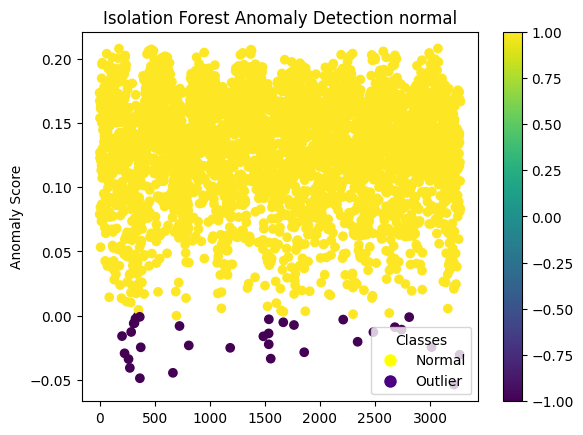

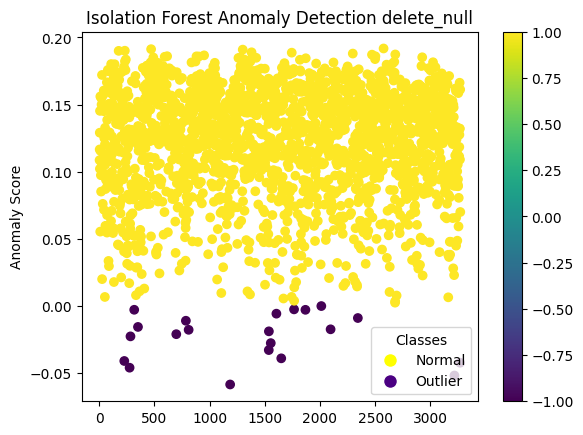

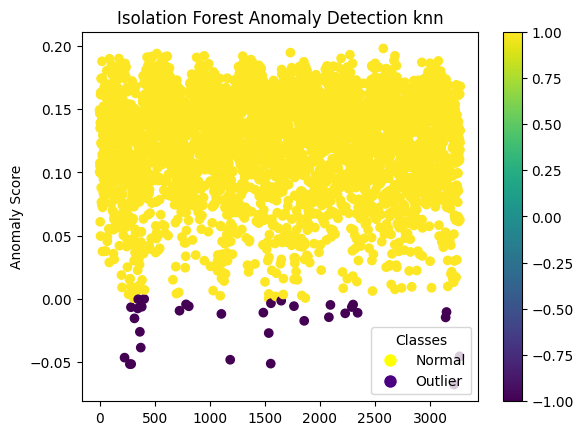

In [33]:
#generate the models and the plots
outliers_f = 0.01
plt.figure(1)
model_if = IsolationForest(contamination=outliers_f)
plot_anomaly(data_norm, model_if, "Isolation Forest", "normal")
plt.figure(2)
plot_anomaly(data_delete_Null, model_if, "Isolation Forest", "delete_null")
plt.figure(3)
plot_anomaly(data_knn, model_if, "Isolation Forest", "knn")
plt.show()

In [34]:
#We have also added 2 columns to the dataframe to mark it as an anomaly. The normal distribution is given as an example
data_norm.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
0  7.151488  204.890455  20791.318981     7.300212  368.516441   
1  3.716080  129.422921  18630.057858     6.635246  344.813835   
2  8.099124  224.236259  19909.541732     9.275884  319.822942   
3  8.316766  214.373394  22018.417441     8.059332  356.886136   
4  9.092223  181.101509  17978.986339     6.546600  310.135738   

   Organic_carbon  Trihalomethanes  Potability  anomaly_score  is_outlier  
0       10.379783        86.990970           0       0.173398           1  
1       15.180013        56.329076           0       0.078873           1  
2       16.868637        66.420093           0       0.167113           1  
3       18.436524       100.341674           0       0.126966           1  
4       11.558279        31.997993           0       0.122716           1

In [35]:
#store the current dataframes with the outlier columns for the isolation forests.
data_anom_norm_if = data_norm.copy()
data_anom_drop_if = data_delete_Null.copy()
data_anom_knn_if = data_knn.copy()

Now that we have looked at the plots for the Isolation Forests, we can look at how other algorithms compare and choose what looks like the best algorithm. Let's do Elliptic Envelope Next.

indices of outliers for normal: 
Int64Index([ 204,  227,  263,  275,  285,  287,  317,  326,  347,  351,  354,
             365,  366,  374,  666,  726,  810, 1186, 1535, 1536, 1554, 1668,
            1669, 1765, 1858, 2212, 2302, 2343, 2486, 2681, 3014, 3218, 3269],
           dtype='int64')
indices of outliers for delete_null: 
Int64Index([  51,  227,  272,  275,  283,  317,  351,  365,  726,  785,  810,
            1186, 1536, 1554, 1649, 1868, 2096, 2343, 3162, 3218, 3269],
           dtype='int64')
indices of outliers for knn: 
Int64Index([ 227,  263,  272,  275,  285,  287,  317,  347,  351,  365,  366,
             374,  726,  785,  810, 1031, 1106, 1186, 1487, 1536, 1554, 1649,
            1858, 2082, 2096, 2290, 2302, 2343, 3014, 3142, 3150, 3218, 3269],
           dtype='int64')


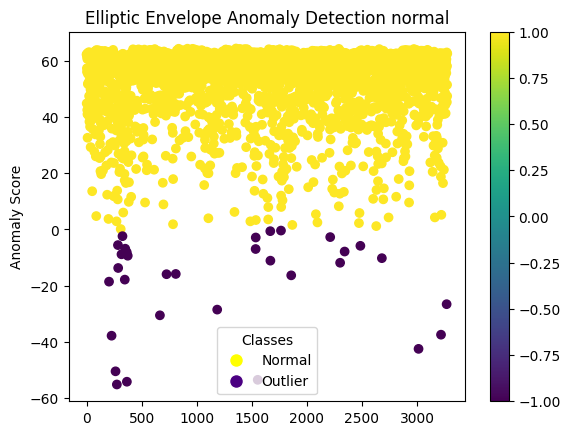

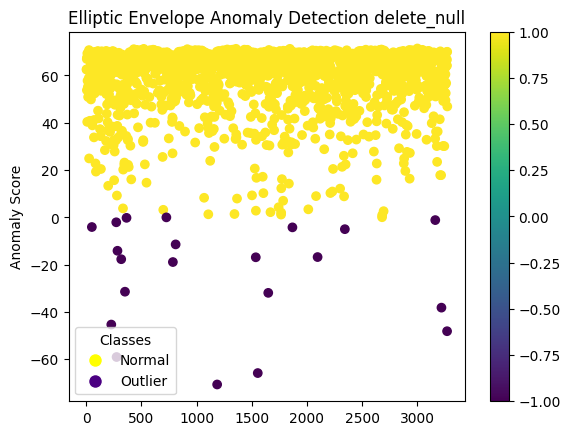

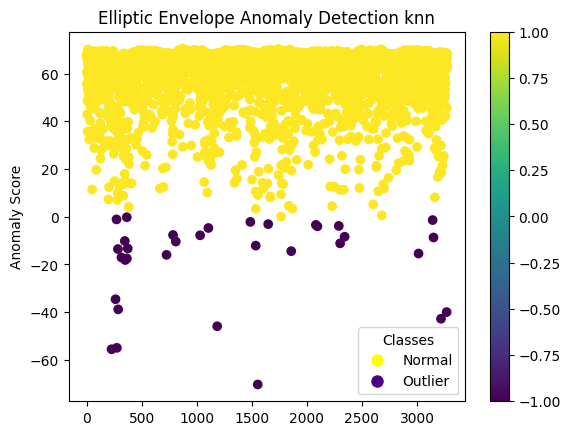

In [36]:
#generate the models and the plots
outliers_f = 0.01
plt.figure(1)
model_ee = EllipticEnvelope(contamination=outliers_f)
plot_anomaly(data_norm, model_ee, "Elliptic Envelope", "normal")
plt.figure(2)
plot_anomaly(data_delete_Null, model_ee, "Elliptic Envelope", "delete_null")
plt.figure(3)
plot_anomaly(data_knn, model_ee, "Elliptic Envelope", "knn")
plt.show()

In [37]:
#store the current dataframes with the outlier columns for the elliptic envelopes.
data_anom_norm_ee = data_norm.copy()
data_anom_drop_ee = data_delete_Null.copy()
data_anom_knn_ee = data_knn.copy()

indices of outliers for normal: 
Int64Index([  56,  330,  475,  531,  692,  698,  785, 1123, 1361, 1792, 1864,
            2006, 2053, 2096, 2236, 2300, 2318, 2482, 2680, 2906, 3035, 3236],
           dtype='int64')
indices of outliers for delete_null: 
Int64Index([ 199,  216,  518,  531,  698, 1123, 1537, 2057, 2236, 2300, 2318,
            2630, 2681, 2694, 2899, 2906],
           dtype='int64')
indices of outliers for knn: 
Int64Index([  56,  123,  133,  204,  330,  518,  531,  698,  719, 1123, 1699,
            1792, 1796, 2057, 2236, 2300, 2318, 2631, 2680, 2694, 2742, 2899,
            2906, 2928, 3035],
           dtype='int64')


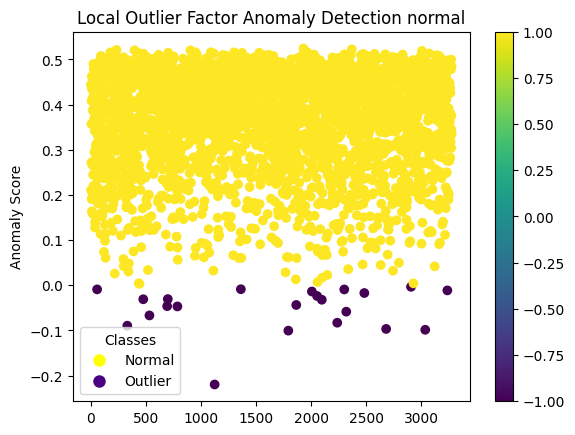

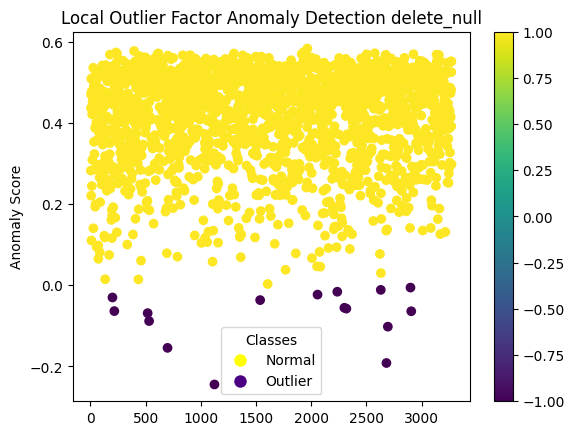

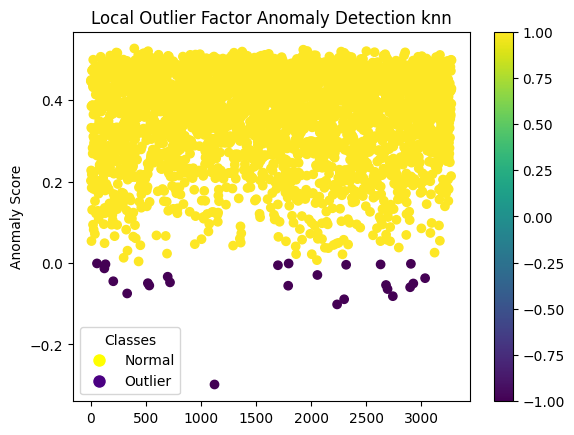

In [38]:
#generate the models and the plots
outliers_f = 0.01
plt.figure(1)
model_lof = LocalOutlierFactor(contamination=outliers_f, novelty=True)
plot_anomaly(data_norm, model_lof, "Local Outlier Factor", "normal")
plt.figure(2)
plot_anomaly(data_delete_Null, model_lof, "Local Outlier Factor", "delete_null")
plt.figure(3)
plot_anomaly(data_knn, model_lof, "Local Outlier Factor", "knn")
plt.show()

In [39]:
#store the current dataframes with the outlier columns for the local outlier factors.
data_anom_norm_lof = data_norm.copy()
data_anom_drop_lof = data_delete_Null.copy()
data_anom_knn_lof = data_knn.copy()

indices of outliers for normal: 
Int64Index([  51,   56,  126,  199,  227,  263,  272,  285,  287,  298,  326,
             346,  365,  374,  408,  441,  518,  531,  666,  698,  719,  783,
             785,  810,  951, 1031, 1075, 1096, 1123, 1316, 1343, 1353, 1361,
            1366, 1483, 1487, 1536, 1554, 1563, 1605, 1668, 1765, 1796, 1864,
            1868, 2012, 2057, 2075, 2082, 2096, 2146, 2236, 2302, 2350, 2482,
            2562, 2602, 2680, 2681, 2694, 2699, 2742, 2796, 2811, 2879, 2899,
            2906, 3014, 3035, 3121, 3162, 3215, 3217, 3236],
           dtype='int64')
indices of outliers for delete_null: 
Int64Index([  70,  199,  216,  225,  248,  283,  345,  346,  365,  385,  408,
             458,  518,  692,  698, 1107, 1112, 1123, 1156, 1343, 1360, 1502,
            1536, 1542, 1669, 1767, 1773, 1784, 1860, 1868, 2006, 2012, 2053,
            2057, 2096, 2156, 2165, 2212, 2318, 2327, 2350, 2395, 2414, 2606,
            2631, 2632, 2681, 2694, 2796, 2895, 2899, 2932, 32

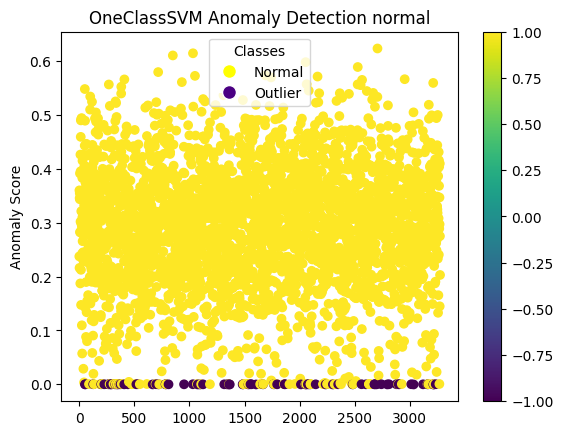

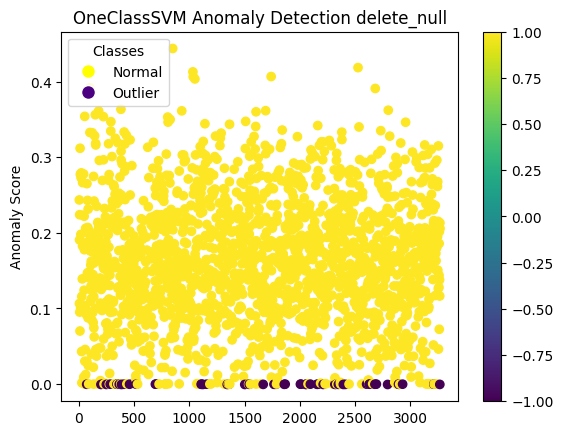

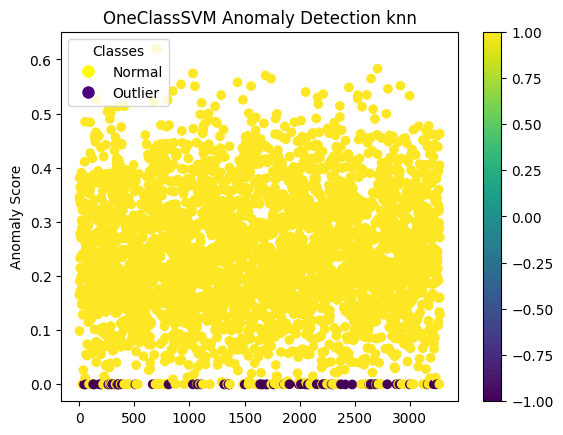

In [40]:
#generate the models and the plots
outliers_f = 0.01
plt.figure(1)
model_svm = OneClassSVM(nu=outliers_f, kernel="rbf")
plot_anomaly(data_norm, model_svm, "OneClassSVM", "normal")
plt.figure(2)
plot_anomaly(data_delete_Null, model_svm, "OneClassSVM", "delete_null")
plt.figure(3)
plot_anomaly(data_knn, model_svm, "OneClassSVM", "knn")
plt.show()

In [41]:
#store the current dataframes with the outlier columns for the OneClassSVM.
data_anom_norm_svm = data_norm.copy()
data_anom_drop_svm = data_delete_Null.copy()
data_anom_knn_svm = data_knn.copy()

# Observations:
- We can see the indices of the dataset that are considered outliers for each algorithm for each dataset
- Some algorithms are better than others. The SVM is not very good since a lot of points are being classified as outliers when they are not
- We can see that many of the indices are overlapping. Maybe we can delete the outliers if the indices appear above a certain number of times in any of the runs

In [42]:
#let's write an algorithm to detect outliers if they appear n or more times in a list of indices
# Returns a list of indices considered outliers
# indices_list is a list of lists to do the comparison
def detect_outliers(indices_list, n):
    index_dict = {}
    outliers = []
    for list in indices_list:
        for index in list:
            if index in index_dict:
                index_dict[index] = index_dict[index] + 1
            else:
                index_dict[index] = 1
    for i in index_dict.keys():
        if index_dict[i] >= n:
            outliers.append(i)
    return(outliers)

Since Length of the datasets are different and they are inherently differently created, let's just look at the outliers generated by the different models for each dataset to generate 3 outliers lists for each dataset

In [43]:
# generate the list of lists for data_norm
list_norm = []
if_norm = list(data_anom_norm_if.loc[data_anom_norm_if['is_outlier'] == -1].index)
ee_norm = list(data_anom_norm_ee.loc[data_anom_norm_ee['is_outlier'] == -1].index)
lof_norm = list(data_anom_norm_lof.loc[data_anom_norm_lof['is_outlier'] == -1].index)
list_norm.extend([if_norm, ee_norm, lof_norm])

#now return an outliers list with n = 2 (basically if 2 or more algorithms classify point as an outlier, we can say it is an outlier)
outliers_norm = detect_outliers(list_norm, 2)
print("outliers detected for data_norm: " + str(outliers_norm))

outliers detected for data_norm: [204, 227, 263, 275, 287, 317, 326, 347, 365, 366, 374, 666, 726, 810, 1186, 1535, 1536, 1554, 1668, 1765, 1858, 2212, 2343, 2486, 2681, 3014, 3218, 3269]


In [44]:
# Repeat for data_delete_Null
list_drop = []
if_drop = list(data_anom_drop_if.loc[data_anom_drop_if['is_outlier'] == -1].index)
ee_drop = list(data_anom_drop_ee.loc[data_anom_drop_ee['is_outlier'] == -1].index)
lof_drop = list(data_anom_drop_lof.loc[data_anom_drop_lof['is_outlier'] == -1].index)
list_drop.extend([if_drop, ee_drop, lof_drop])

outliers_drop = detect_outliers(list_drop, 2)
print("outliers detected for data_delete_Null: " + str(outliers_drop))

outliers detected for data_delete_Null: [227, 275, 283, 317, 351, 698, 785, 810, 1186, 1536, 1537, 1554, 1649, 1868, 2096, 2343, 3218, 3269]


In [45]:
# Repeat for data_knn
list_knn = []
if_knn = list(data_anom_knn_if.loc[data_anom_knn_if['is_outlier'] == -1].index)
ee_knn = list(data_anom_knn_ee.loc[data_anom_knn_ee['is_outlier'] == -1].index)
lof_knn = list(data_anom_knn_lof.loc[data_anom_knn_lof['is_outlier'] == -1].index)
list_knn.extend([if_knn, ee_knn, lof_knn])

outliers_knn = detect_outliers(list_knn, 2)
print("outliers detected for data_knn: " + str(outliers_knn))

outliers detected for data_knn: [227, 275, 285, 287, 317, 347, 351, 366, 374, 726, 785, 810, 1106, 1186, 1487, 1536, 1554, 1649, 1858, 2082, 2096, 2290, 2302, 2343, 3142, 3150, 3218, 3269]


## Removing Outliers
Now that we have a list of outliers, we can create copies from out original 3 data frames without the outliers for 6 data frames total. Let's also remove the extra columns we added during anomaly detection. We can run our models on all of these data sets to see which one produces the best results.

In [46]:
data_norm.drop(columns=["is_outlier", "anomaly_score"], inplace=True)
data_delete_Null.drop(columns=["is_outlier", "anomaly_score"], inplace=True)
data_knn.drop(columns=["is_outlier", "anomaly_score"], inplace=True)

In [47]:
#we have reset the data frames

# print the shapes
print(data_norm.shape)
print(data_delete_Null.shape)
print(data_knn.shape)

#print an example dataframe
data_norm.head()

(3276, 8)
(2011, 8)
(3276, 8)


ph    Hardness        Solids  Chloramines     Sulfate  \
0  7.151488  204.890455  20791.318981     7.300212  368.516441   
1  3.716080  129.422921  18630.057858     6.635246  344.813835   
2  8.099124  224.236259  19909.541732     9.275884  319.822942   
3  8.316766  214.373394  22018.417441     8.059332  356.886136   
4  9.092223  181.101509  17978.986339     6.546600  310.135738   

   Organic_carbon  Trihalomethanes  Potability  
0       10.379783        86.990970           0  
1       15.180013        56.329076           0  
2       16.868637        66.420093           0  
3       18.436524       100.341674           0  
4       11.558279        31.997993           0

In [48]:
# create the ones without outliers
data_norm_no_outliers = data_norm.drop(outliers_norm)
data_norm_no_outliers = data_norm_no_outliers.reset_index(drop=True)
data_delete_no_outliers = data_delete_Null.drop(outliers_drop)
data_delete_no_outliers = data_delete_no_outliers.reset_index(drop=True)
data_knn_no_outliers = data_knn.drop(outliers_knn)
data_knn_no_outliers = data_knn_no_outliers.reset_index(drop=True)

In [49]:
# print the shapes
print(data_norm_no_outliers.shape)
print(data_delete_no_outliers.shape)
print(data_knn_no_outliers.shape)

#print an example dataframe
data_norm_no_outliers.head()

(3248, 8)
(1993, 8)
(3248, 8)


ph    Hardness        Solids  Chloramines     Sulfate  \
0  7.151488  204.890455  20791.318981     7.300212  368.516441   
1  3.716080  129.422921  18630.057858     6.635246  344.813835   
2  8.099124  224.236259  19909.541732     9.275884  319.822942   
3  8.316766  214.373394  22018.417441     8.059332  356.886136   
4  9.092223  181.101509  17978.986339     6.546600  310.135738   

   Organic_carbon  Trihalomethanes  Potability  
0       10.379783        86.990970           0  
1       15.180013        56.329076           0  
2       16.868637        66.420093           0  
3       18.436524       100.341674           0  
4       11.558279        31.997993           0

Before we working on modeling, we standarized the data

In [50]:
### Standardize data (can use scaled/standard data or original, up to user)
# rename to numbered datasets instead of named to make it easier to type :)
scaler = StandardScaler()

data1_scaled = data_with_null.drop(columns = "Potability")
data1_scaled = scaler.fit_transform(data1_scaled)
data1_scaled = pd.DataFrame(data1_scaled, columns=data_with_null.columns[:-1])
data1_scaled["Potability"] = data_with_null["Potability"]

data2_scaled = data_delete_Null.drop(columns = "Potability").reset_index(drop=True)
data2_scaled = scaler.fit_transform(data2_scaled)
data2_scaled = pd.DataFrame(data2_scaled, columns=data_delete_Null.columns[:-1])
data2_scaled["Potability"] = data_delete_Null["Potability"].reset_index(drop=True)

data3_scaled = data_knn.drop(columns = "Potability")
data3_scaled = scaler.fit_transform(data3_scaled)
data3_scaled = pd.DataFrame(data3_scaled, columns=data_knn.columns[:-1])
data3_scaled["Potability"] = data_knn["Potability"]

data4_scaled = data_norm.drop(columns = "Potability")
data4_scaled = scaler.fit_transform(data4_scaled)
data4_scaled = pd.DataFrame(data4_scaled, columns=data_norm.columns[:-1])
data4_scaled["Potability"] = data_norm["Potability"]

data2_scaled_no_outliers = data_delete_no_outliers.drop(columns = "Potability")
data2_scaled_no_outliers = scaler.fit_transform(data2_scaled_no_outliers)
data2_scaled_no_outliers = pd.DataFrame(data2_scaled_no_outliers, columns=data_delete_no_outliers.columns[:-1])
data2_scaled_no_outliers["Potability"] = data_delete_no_outliers["Potability"].reset_index(drop=True)

data3_scaled_no_outliers = data_knn_no_outliers.drop(columns = "Potability")
data3_scaled_no_outliers = scaler.fit_transform(data3_scaled_no_outliers)
data3_scaled_no_outliers = pd.DataFrame(data3_scaled_no_outliers, columns=data_knn_no_outliers.columns[:-1])
data3_scaled_no_outliers["Potability"] = data_knn_no_outliers["Potability"]

data4_scaled_no_outliers = data_norm_no_outliers.drop(columns = "Potability")
data4_scaled_no_outliers = scaler.fit_transform(data4_scaled_no_outliers)
data4_scaled_no_outliers = pd.DataFrame(data4_scaled_no_outliers, columns=data_norm_no_outliers.columns[:-1])
data4_scaled_no_outliers["Potability"] = data_norm_no_outliers["Potability"]

data1_scaled.head()

ph  Hardness    Solids  Chloramines   Sulfate  Organic_carbon  \
0       NaN  0.259195 -0.139471     0.112415  0.838973       -1.180651   
1 -2.110818 -2.036414 -0.385987    -0.307694       NaN        0.270597   
2  0.638838  0.847665 -0.240047     1.360594       NaN        0.781117   
3  0.775374  0.547651  0.000493     0.592008  0.558106        1.255134   
4  1.261849 -0.464429 -0.460249    -0.363698 -0.570898       -0.824357   

   Trihalomethanes  Potability  
0         1.273445           0  
1        -0.622493           0  
2         0.001472           0  
3         2.098969           0  
4        -2.126974           0


# Modeling

Having feature engineered datasets, we train various models to figure out the best model, and determine best feature engineering method at the last. We don't use dataset with NaN values since most models do not accept such values.

In [51]:
methods = ["delete", "knn", "norm", "delete_no_outliers", "knn_no_outliers", "norm_no_outliers"]

original_data_list = [
    data2_scaled,
    data3_scaled,
    data4_scaled,
    data2_scaled_no_outliers,
    data3_scaled_no_outliers,
    data4_scaled_no_outliers,
]

We will use supervised learning techniques, since our dataset is labeled. We start with a simple function to train a model once on train split, and calculate the accuracy on test split.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def naive_acc(original_data, pipe):
  features = original_data.loc[:, original_data.columns != 'Potability']
  labels = original_data['Potability'].values.ravel()
  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=123)

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  print("Accuracy:", accuracy_score(y_test, y_pred))

We define a function to perform nested CV with Grid Search.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

def grid_nestCV(original_data, pipe, param_grid):

  features = original_data.loc[:, original_data.columns != 'Potability']
  labels = original_data['Potability'].values.ravel()

  grid = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)
  accs = cross_val_score(grid, features, labels, cv=5)
  print("Average Accuracy:", sum(accs)/len(accs))

### Decision Tree

Let's start with simple Decision Tree.

In [60]:
from sklearn.tree import DecisionTreeClassifier

for i, method in enumerate(methods):
  print(method)
  dt = DecisionTreeClassifier(criterion="entropy", random_state=123)
  pipe = Pipeline([('dt', dt)])
  naive_acc(original_data_list[i], pipe)

delete
Accuracy: 0.5955334987593052
knn
Accuracy: 0.5990853658536586
norm
Accuracy: 0.5594512195121951
delete_no_outliers
Accuracy: 0.6090225563909775
knn_no_outliers
Accuracy: 0.58
norm_no_outliers
Accuracy: 0.5538461538461539


Maybe we can guess that norm-based datasets are bad?

We train Decision Tree Classifier with nested CV with Grid Search.

In [55]:
from sklearn.pipeline import Pipeline

param_grid = {
  'dt__criterion':['entropy', 'gini'],
  'dt__max_depth':[5, 10, 15, 20],
  'dt__min_samples_leaf':[5, 10, 15, 20],
  'dt__max_features':[5, 10, 15]
}

for i, method in enumerate(methods):
  print(method)
  dt = DecisionTreeClassifier(random_state=123)
  pipe = Pipeline([('dt', dt)])
  grid_nestCV(original_data_list[i], pipe, param_grid)

delete
Average Accuracy: 0.6101625865708677
knn
Average Accuracy: 0.6315714019735618
norm
Average Accuracy: 0.6056153416495997
delete_no_outliers
Average Accuracy: 0.6101258170552009
knn_no_outliers
Average Accuracy: 0.6249922958397536
norm_no_outliers
Average Accuracy: 0.5991371340523882


Feature engineered datasets with knn perform well, especially knn achieving 63.2%. norm-based datasets exhibit the worst performance. Let's see if these hold with other models, too.

### KNN

We already scaled our data, but we need to reduce dimensionality. We make a pipeline of PCA and KNeighborsClassifier.

In [63]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

for i, method in enumerate(methods):
  print(method)
  pca = PCA()
  neigh = KNeighborsClassifier(n_neighbors=7)
  pipe = Pipeline([('pca', pca), ('neigh', neigh)])
  naive_acc(original_data_list[i], pipe)

delete
Accuracy: 0.6997518610421837
knn
Accuracy: 0.6753048780487805
norm
Accuracy: 0.6387195121951219
delete_no_outliers
Accuracy: 0.6867167919799498
knn_no_outliers
Accuracy: 0.6492307692307693
norm_no_outliers
Accuracy: 0.6369230769230769


Delete might perform well in KNN!

In [56]:
param_grid = {
  'pca__n_components': list(range(5, 19)),
  'neigh__n_neighbors': list(range(1, 25))
}

for i, method in enumerate(methods):
  print(method)
  pca = PCA()
  neigh = KNeighborsClassifier()
  pipe = Pipeline([('pca', pca), ('neigh', neigh)])
  grid_nestCV(original_data_list[i], pipe, param_grid)

delete
Average Accuracy: 0.6315506833080257
knn
Average Accuracy: 0.6236254887358034
norm
Average Accuracy: 0.619657884937628
delete_no_outliers
Average Accuracy: 0.6327199909321041
knn_no_outliers
Average Accuracy: 0.6280720635296907
norm_no_outliers
Average Accuracy: 0.62838117814389


While norm-based datasets still demonstrating worst performance, delete-based datasets are better! Also since we tried only one split above, they are very noisy -- in fact, by chance it seems to be a very 'good' split.

### Naive Bayes

For Naive Bayes Classifier, there is only one hyperparemeter: var_smoothing.

Instead of GridSearch, let's observe confusion matrix in addition to accuracy.

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

def NB_CV(original_data):

  features = original_data.loc[:, original_data.columns != 'Potability']
  labels = original_data['Potability'].values.ravel()

  nb = GaussianNB()
  y_pred = cross_val_predict(nb, features, labels, cv=10)
  print(classification_report(labels, y_pred))

for i, method in enumerate(methods):
  print(method)
  NB_CV(original_data_list[i])

delete
              precision    recall  f1-score   support

           0       0.63      0.87      0.73      1200
           1       0.56      0.25      0.35       811

    accuracy                           0.62      2011
   macro avg       0.60      0.56      0.54      2011
weighted avg       0.60      0.62      0.58      2011

knn
              precision    recall  f1-score   support

         0.0       0.63      0.88      0.74      1998
         1.0       0.52      0.21      0.30      1278

    accuracy                           0.62      3276
   macro avg       0.58      0.54      0.52      3276
weighted avg       0.59      0.62      0.56      3276

norm
              precision    recall  f1-score   support

           0       0.63      0.88      0.74      1998
           1       0.51      0.19      0.27      1278

    accuracy                           0.61      3276
   macro avg       0.57      0.54      0.50      3276
weighted avg       0.58      0.61      0.56      3276

del

Norm-based datasets are still worst, but the differences between accuracies are relatively small. When we also observe f1-score, delete-based datasets are better, aligning with KNN.

### Linear Discriminant Analysis

Linear Discriminany Analysis (LDA) assumes a linear decision boundary using Bayes Rule, however assuming same covariances of variables.

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

for i, method in enumerate(methods):
  print(method)
  lda = LinearDiscriminantAnalysis()
  pipe = Pipeline([('lda', lda)])
  naive_acc(original_data_list[i], pipe)

delete
Accuracy: 0.6377171215880894
knn
Accuracy: 0.600609756097561
norm
Accuracy: 0.600609756097561
delete_no_outliers
Accuracy: 0.6365914786967418
knn_no_outliers
Accuracy: 0.6092307692307692
norm_no_outliers
Accuracy: 0.6092307692307692


In [102]:
param_grid = {
  'lda__solver': ['svd', 'lsqr', 'eigen']
}

for i, method in enumerate(methods):
  print(method)
  lda = LinearDiscriminantAnalysis()
  pipe = Pipeline([('lda', lda)])
  grid_nestCV(original_data_list[i], pipe, param_grid)

delete
Average Accuracy: 0.5962211276125575
knn
Average Accuracy: 0.6105008378328058
norm
Average Accuracy: 0.610500372370136
delete_no_outliers
Average Accuracy: 0.6001007543985593
knn_no_outliers
Average Accuracy: 0.6136086286594761
norm_no_outliers
Average Accuracy: 0.6120687448145075


It is worse than Gaussian Naive Bayes, since for high chances the covariances would not be the same.

### SVM

In [67]:
from sklearn.svm import SVC

for i, method in enumerate(methods):
  print(method)
  svc = SVC()
  pipe = Pipeline([('svc', svc)])
  naive_acc(original_data_list[i], pipe)

delete
Accuracy: 0.71712158808933
knn
Accuracy: 0.6920731707317073
norm
Accuracy: 0.6783536585365854
delete_no_outliers
Accuracy: 0.6992481203007519
knn_no_outliers
Accuracy: 0.6876923076923077
norm_no_outliers
Accuracy: 0.6646153846153846


In [71]:
param_grid = {
  'svc__C': [0.1, 1, 10],
  'svc__kernel': ['linear', 'rbf', 'poly']
}

for i, method in enumerate(methods):
  print(method)
  svc = SVC()
  pipe = Pipeline([('svc', svc)])
  grid_nestCV(original_data_list[i], pipe, param_grid)

delete
Average Accuracy: 0.652437564040838
knn
Average Accuracy: 0.6508038540309067
norm
Average Accuracy: 0.6193571960528766
delete_no_outliers
Average Accuracy: 0.6663455120212591
knn_no_outliers
Average Accuracy: 0.650858836079175
norm_no_outliers
Average Accuracy: 0.621908735332464


While preserving the previously seen order, SVM demonstrates the highest accuracy among the models!

### Ensemble

#### Random Forests

In [72]:
from sklearn.ensemble import RandomForestClassifier

for i, method in enumerate(methods):
  print(method)
  rfc = RandomForestClassifier(random_state=123)
  pipe = Pipeline([('rfc', rfc)])
  naive_acc(original_data_list[i], pipe)

delete
Accuracy: 0.707196029776675
knn
Accuracy: 0.6829268292682927
norm
Accuracy: 0.6463414634146342
delete_no_outliers
Accuracy: 0.6967418546365914
knn_no_outliers
Accuracy: 0.6492307692307693
norm_no_outliers
Accuracy: 0.6415384615384615


In [77]:
param_grid = {
  'rfc__n_estimators': [50, 100, 150],
  'rfc__max_depth':[10, 15]
}

for i, method in enumerate(methods):
  print(method)
  rfc = RandomForestClassifier(random_state=123)
  pipe = Pipeline([('rfc', rfc)])
  grid_nestCV(original_data_list[i], pipe, param_grid)

delete
Average Accuracy: 0.6479673592336086
knn
Average Accuracy: 0.6425623719977658
norm
Average Accuracy: 0.6266849748650157
delete_no_outliers
Average Accuracy: 0.6442664450069899
knn_no_outliers
Average Accuracy: 0.6394685314685316
norm_no_outliers
Average Accuracy: 0.6222254355813679


This is worse than SVM, but better than Decision Tree!

#### Extremely Randomized Trees

In [78]:
from sklearn.ensemble import ExtraTreesClassifier

for i, method in enumerate(methods):
  print(method)
  etc = ExtraTreesClassifier(random_state=123)
  pipe = Pipeline([('etc', etc)])
  naive_acc(original_data_list[i], pipe)

delete
Accuracy: 0.7146401985111662
knn
Accuracy: 0.6509146341463414
norm
Accuracy: 0.6585365853658537
delete_no_outliers
Accuracy: 0.7042606516290727
knn_no_outliers
Accuracy: 0.6415384615384615
norm_no_outliers
Accuracy: 0.6615384615384615


In [79]:
param_grid = {
  'etc__n_estimators': [50, 100, 150],
  'etc__max_depth':[10, 15]
}

for i, method in enumerate(methods):
  print(method)
  etc = ExtraTreesClassifier(random_state=123)
  pipe = Pipeline([('etc', etc)])
  grid_nestCV(original_data_list[i], pipe, param_grid)

delete
Average Accuracy: 0.6405059071886227
knn
Average Accuracy: 0.6373692049897598
norm
Average Accuracy: 0.6227127164401415
delete_no_outliers
Average Accuracy: 0.631721262956386
knn_no_outliers
Average Accuracy: 0.6379291217257318
norm_no_outliers
Average Accuracy: 0.6209922958397535


Slight decrease in performance -- Random Forest is better!

#### AdaBoost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

for i, method in enumerate(methods):
  print(method)
  abc = AdaBoostClassifier(random_state=123)
  pipe = Pipeline([('abc', abc)])
  naive_acc(original_data_list[i], pipe)

delete
Accuracy: 0.6203473945409429
knn
Accuracy: 0.6234756097560976
norm
Accuracy: 0.6051829268292683
delete_no_outliers
Accuracy: 0.5789473684210527
knn_no_outliers
Accuracy: 0.6015384615384616
norm_no_outliers
Accuracy: 0.6


In [83]:
param_grid = {
  'abc__n_estimators': [50, 100],
  'abc__learning_rate':[0.1, 1.0, 5.0]
}

for i, method in enumerate(methods):
  print(method)
  abc = AdaBoostClassifier(random_state=123)
  pipe = Pipeline([('abc', abc)])
  grid_nestCV(original_data_list[i], pipe, param_grid)

delete
Average Accuracy: 0.5982087083194448
knn
Average Accuracy: 0.6190453360640477
norm
Average Accuracy: 0.6105013032954757
delete_no_outliers
Average Accuracy: 0.5865417312124532
knn_no_outliers
Average Accuracy: 0.6188341827663862
norm_no_outliers
Average Accuracy: 0.6092966694322627


AdaBoost is even worse!

#### Voting

Here we majority vote classifiers that performed well. We vary one hyperparameter per classifier since it's very computationally expensive.

In [98]:
from sklearn.ensemble import VotingClassifier

for i, method in enumerate(methods):
  print(method)
  svc = SVC()
  rfc = RandomForestClassifier(random_state=123)
  etc = ExtraTreesClassifier(random_state=123)
  vc = VotingClassifier(estimators=[('svc', svc), ('rfc', rfc), ('etc', etc)])
  naive_acc(original_data_list[i], vc)

delete
Accuracy: 0.7146401985111662
knn
Accuracy: 0.6783536585365854
norm
Accuracy: 0.6753048780487805
delete_no_outliers
Accuracy: 0.706766917293233
knn_no_outliers
Accuracy: 0.6707692307692308
norm_no_outliers
Accuracy: 0.6584615384615384


In [85]:
param_grid = {
  'svc__kernel': ['rbf', 'poly'],
  'rfc__n_estimators': [50, 100],
  'etc__max_depth':[10, 15]
}

for i, method in enumerate(methods):
  print(method)
  svc = SVC()
  rfc = RandomForestClassifier(random_state=123)
  etc = ExtraTreesClassifier(random_state=123)
  vc = VotingClassifier(estimators=[('svc', svc), ('rfc', rfc), ('etc', etc)])
  grid_nestCV(original_data_list[i], vc, param_grid)

delete
Average Accuracy: 0.6509400886386925
knn
Average Accuracy: 0.6407307763917334
norm
Average Accuracy: 0.6208853099981381
delete_no_outliers
Average Accuracy: 0.65881538015894
knn_no_outliers
Average Accuracy: 0.6413132630081784
norm_no_outliers
Average Accuracy: 0.6243788076330449


Performances on delete-based are slighly worse than SVM, but by ensembling the model gets better on norm-based methods since it aggregates independent results. Overall, this is the best among ensembles.

### Neural Networks

In [99]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

@ignore_warnings(category=ConvergenceWarning)
def run_nn():
    for i, method in enumerate(methods):
      print(method)
      mlp = MLPClassifier(random_state=123)
      pipe = Pipeline([('mlp', mlp)])
      naive_acc(original_data_list[i], pipe)

run_nn()

delete
Accuracy: 0.71712158808933
knn
Accuracy: 0.6859756097560976
norm
Accuracy: 0.676829268292683
delete_no_outliers
Accuracy: 0.6917293233082706
knn_no_outliers
Accuracy: 0.6861538461538461
norm_no_outliers
Accuracy: 0.6738461538461539


In [100]:
@ignore_warnings(category=ConvergenceWarning)
def run_nn_grid():
    param_grid = {
      'mlp__hidden_layer_sizes': [(30,), (45,), (60,)],
      'mlp__activation': ['logistic', 'tanh', 'relu'],
    }

    for i, method in enumerate(methods):
      print(method)
      mlp = MLPClassifier(random_state=123)
      pipe = Pipeline([('mlp', mlp)])
      grid_nestCV(original_data_list[i], pipe, param_grid)

run_nn_grid()

delete
Average Accuracy: 0.6494512548917941
knn
Average Accuracy: 0.6285207596350773
norm
Average Accuracy: 0.6077564699311115
delete_no_outliers
Average Accuracy: 0.6533066334177151
knn_no_outliers
Average Accuracy: 0.6274533601991228
norm_no_outliers
Average Accuracy: 0.6135981984117578


Neural Networks are revolutionizing the world. However in small, real-world problem, traditional methods like SVM and ensemble may work better.

### Results

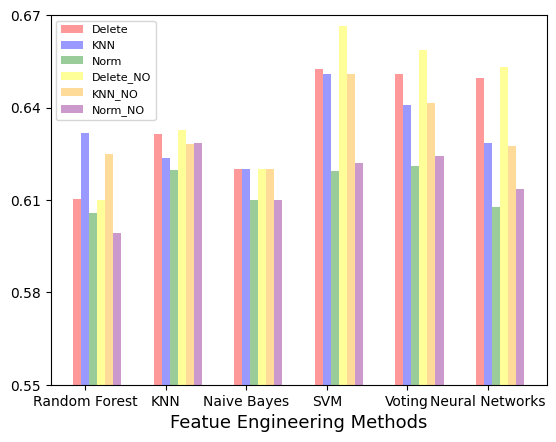

In [107]:
accs = [
    [0.6101625865708677, 0.6315714019735618, 0.6056153416495997, 0.6101258170552009, 0.6249922958397536, 0.5991371340523882],
    [0.6315506833080257, 0.6236254887358034, 0.619657884937628, 0.6327199909321041, 0.6280720635296907, 0.62838117814389],
    [0.62, 0.62, 0.61, 0.62, 0.62, 0.61],
    [0.652437564040838,  0.6508038540309067, 0.6193571960528766, 0.6663455120212591, 0.650858836079175, 0.621908735332464],
    [0.6509400886386925, 0.6407307763917334, 0.6208853099981381, 0.65881538015894, 0.6413132630081784, 0.6243788076330449],
    [0.6494512548917941, 0.6285207596350773, 0.6077564699311115, 0.6533066334177151, 0.6274533601991228, 0.6135981984117578]
]

f, ax1 = plt.subplots(ncols=1, nrows=1)
d = .7

ax1.set_ylim(0.55, 0.67)

ax1.set_yticks([0.55, 0.58, 0.61, 0.64, 0.67])

bar_width = 0.1

index = np.arange(6)

b1 = ax1.bar(index, [x[0] for x in accs], bar_width, alpha=0.4, color='red', label="Delete")
b2 = ax1.bar(index + bar_width, [x[1] for x in accs], bar_width, alpha=0.4, color='blue', label='KNN')
b3 = ax1.bar(index + 2 * bar_width, [x[2] for x in accs], bar_width, alpha=0.4, color='green', label='Norm')
b4 = ax1.bar(index + 3 * bar_width, [x[3] for x in accs], bar_width, alpha=0.4, color='yellow', label='Delete_NO')
b5 = ax1.bar(index + 4 * bar_width, [x[4] for x in accs], bar_width, alpha=0.4, color='orange', label='KNN_NO')
b6 = ax1.bar(index + 5 * bar_width, [x[5] for x in accs], bar_width, alpha=0.4, color='purple', label='Norm_NO')

plt.xticks(np.arange(bar_width, 6 + bar_width, 1), ["Random Forest", "KNN", "Naive Bayes", "SVM", "Voting", "Neural Networks"])

plt.xlabel('Featue Engineering Methods', size = 13)
ax1.legend(loc="upper left", fontsize=8)

We aggregate the results. Except for Random Forest, we observe that removing outliers tend to increase the performance compared to its counterparts. Throughout feature engineering methods, we observe that deleting missing values performs the best, followed by knn and norm. Perhaps Missing values have occurred since something went wrong, hence not adhering to its ordinary behaviours we observed above. We select SVM + Delete_no_outliers to build our final model.

Now, we build our final model.

In [110]:
param_grid = {
  'svc__C': [0.1, 1, 10],
  'svc__kernel': ['linear', 'rbf', 'poly']
}

svc = SVC()
pipe = Pipeline([('svc', svc)])

grid = GridSearchCV(pipe, param_grid, scoring="accuracy", cv=5)

features = data2_scaled_no_outliers.loc[:, data2_scaled_no_outliers.columns != 'Potability']
labels = data2_scaled_no_outliers['Potability'].values.ravel()

grid.fit(features, labels)
print(grid.best_params_)

#### This is our final model
final_model = grid

{'svc__C': 1, 'svc__kernel': 'rbf'}
